# <font color=black><center><font size =18> Case Study:Descriptive analysis </font>
<font><center>![](https://www.startup.ch/demandit/files/M_BB941CC4DCEF687AD98/dms//Image/download%20(1)1.png)

# 0. Preparation :

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")
from math import ceil
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math
import gc 

In [2]:
! pip3 install xlrd

     |████████████████████████████████| 96 kB 700 kB/s 


In [3]:
! pip3 install openpyxl

     |████████████████████████████████| 243 kB 868 kB/s 


In [4]:
# Load the datas 
data = pd.read_excel("../input/historyloandatas/ATUCE_-_Data_Scientist_-_Case_study_data_2021_03.xlsx")

In [5]:
# take a look at the datas
data.head()

,ID,Pays,Taux,Mois,Montant,Niveau de risque,Emprunteur,capital social,année de création,Antériorité,...,Dettes Nettes / EBE(* années) 17,Dettes Nettes / EBE(* années) 18,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Dettes Nettes / Fonds propres 17,Dettes Nettes / Fonds propres 18,BFRE en nombre de jours de CA 15,BFRE en nombre de jours de CA 16,BFRE en nombre de jours de CA 17,BFRE en nombre de jours de CA 18
0,755334684,France,"5,85 %",48,1 100 000 €,B,Ets Provost Frères,3 058 500 €,1962,1991,...,"9,18*","4,26*",NaN,"125,88%","97,66%","66,94%",NaN,367,252,200.0
1,666598628,Espagne,"5,50 %",48,310 000 €,B+,INTERNATIONAL STUDIES SA,396 072 €,1985,1998,...,"0,32 *","0,11 *",NaN,"21,51%","19,20%","8,46%",NaN,NaN,NaN,NaN
2,528199436,Pays-Bas,"6,45 %",48,165 000 €,B,Docufiller Sales,900,2016,2016,...,"-0,01*","0,47*",NaN,"2870,00%","-7,69%","135,48%",NaN,102,-19,71.0
3,353279184,France,0.06,60,2 000 000 €,B,E.B.P.,10 000 €,2016,2014,...,"3,34*","2,99*",NaN,NaN,"157,76%","156,74%",NaN,NaN,45,35.0
4,633690177,Italie,"4,90 %",36,100 000 €,B+,Deltagamma,10 000 €,2003,2003,...,"2,38 *","0,30 *",NaN,"-0,22","0,23","0,12",NaN,NaN,NaN,NaN


# 1. Cleaning datas:

## 1.1 Data processing and preparation :

In [6]:
data["Taux"] = data["Taux"].str.replace(",",".").str.replace("%","").astype("float")

In [7]:
data["Montant"] = data["Montant"].str.replace("€","").str.replace(" ","").str.replace("5\xa0000\xa0000\xa0","NaN").astype("float")

In [8]:
data["Antériorité"]=data["Antériorité"].replace("200811 à 50\n","2008").astype("int")

In [9]:
data["capital social"] = data["capital social"].str.replace("€","").str.replace(" ","").\
str.replace("\n","").str.replace("6\xa0000\xa0","NaN").str.replace("-","NaN").str\
.replace('566\xa0500\xa0',"NaN").astype("float")

In [10]:
for i in range(15,19):
    data[f"Nombre de mois de la période {i}"] = data[f"Nombre de mois de la période {i}"].str.replace("mois"," ").str.replace("-","NaN").\
    str.replace(",",".").str.replace('31/10/2017','NaN').astype("float")

In [11]:
for i in range(15,19):
    data[f"Chiffre d\'Affaires {i}"] = data[f"Chiffre d\'Affaires {i}"].str.replace(" ","").\
    str.replace(",",".").str.replace("-","NaN").str.replace('20\xa0713',"NaN").str.replace\
    ("€","").str.replace('Na',"NaN").str.replace('NaNN',"NaN").str.replace('23\xa0217',"NaN").\
    str.replace('13mois',"NaN").astype("float")

In [12]:
for i in range(15,19):
    data[f"Evolution du Chiffre d\'Affaires {i}"] = data[f"Evolution du Chiffre d\'Affaires {i}"].str.\
    replace("%","").str.replace("N/A","NaN").str.replace("n/a","NaN").str.replace("-","NaN").str.replace(",",".").str.replace('N/a','NaN')\
    .str.replace(r"^Na[\w \W]*","NaN").str.replace(" ","").astype(float)

In [13]:
for i in range(15,19):
    data[f"EBE(retraité des loyers de leasing) {i}"] = data[f"EBE(retraité des loyers de leasing) {i}"].str.replace('\d*%*\s*-\s*\d*%',"NaN").\
    str.replace(" ","").str.replace("-","NaN").str.replace('NaN1021',"NaN").str.replace("8\xa0512","NaN").\
    str.replace(",",".").str.replace('11\xa0310',"NaN").astype("float")

In [14]:
for i in range(15,19):
  data[f"Total Bilan {i}"]=data[f"Total Bilan {i}"].str.replace(" ","").str.replace(",",".").\
  str.replace("-","NaN").str.replace('105\xa0222',"NaN").str.replace("€","").str.replace('124\xa0150',"NaN").\
  str.replace('5%NaN10%',"NaN").astype("float")

In [15]:
for i in range(15,19):
    data[f"BFRE {i}"]=data[f"BFRE {i}"].str.replace(" ","").str.replace("-","NaN").\
    str.replace('NaN\d*',"NaN").str.replace(",",".").str.replace("%","").str.replace('5\xa0427',"NaN").\
    astype("float")

In [16]:
for i in range(15,19):
   data[f"Capacité de remboursement (FCCR) {i}"]=data[f"Capacité de remboursement (FCCR) {i}"].str.replace(",",".").\
   str.replace("-","NaN").str.replace('NaN\d*.\d*\s*',"NaN").str.replace(" ","").astype("float")

In [17]:
for i in range(15,19):
  data[f"Fonds Propres {i}"] = data[f"Fonds Propres {i}"].str.replace(" ","").str.replace(",",".").\
  str.replace("-","NaN").str.replace("NaN.*\d*","NaN").str.replace("21\xa0386","NaN").str.replace("\W","").\
  str.replace('28\xa0340',"NaN").astype("float")

In [18]:
for i in range(15,19):
   data[f"Fonds Propres / Total Bilan {i}"]=data[f"Fonds Propres / Total Bilan {i}"].str.replace(",",".").\
   str.replace("%","").str.replace(" ","").str.replace("-","NaN").str.replace("NaN\d*.*\d*","NaN").\
   str.replace("*","").astype("float")

In [19]:
for i in range(15,19):
   data[f"Passif circulant {i}"]=data[f"Passif circulant {i}"].str.replace(" ","").str.\
   replace("-","NaN").str.replace('22\xa0016',"NaN").str.replace("€","").str.replace('17\xa0474',"NaN").\
   str.replace(",",".").str.replace("*","").astype("float")

In [20]:
for i in range(15,19):
  data[f"Actif immobilisé {i}"] = data[f"Actif immobilisé {i}"].str.replace(" ","").str.replace("€","").\
  str.replace("-","NaN").str.replace('82\xa0643',"NaN").str.replace('101\xa0249',"NaN").\
  str.replace(",",".").str.replace("%","").astype("float")
  data[f"Actif circulant {i}"] = data[f"Actif circulant {i}"].str.replace(" ","").str.replace("€","").\
  str.replace("-","NaN").str.replace('82\xa0643',"NaN").str.replace('101\xa0249',"NaN").\
  str.replace(",",".").str.replace("%","").str.replace('22\xa0579',"NaN").str.replace('22\xa0901',"NaN").\
  astype("float")

In [21]:
for i in range(15,19):
   data[f"Dettes court terme {i}"]= data[f"Dettes court terme {i}"].str.replace(" ","").str.replace("€","").\
   str.replace("-","NaN").str.replace('82\xa0643',"NaN").str.replace('101\xa0249',"NaN").\
   str.replace(",",".").str.replace("%","").str.replace('22\xa0579',"NaN").str.replace('22\xa0901',"NaN").\
   str.replace("*","").str.replace("NaN\d*.*\d*","NaN").str.replace("11\xa0172","NaN").\
   str.replace('9\xa0258',"NaN").astype("float")
   data[f"Dettes Moyen long terme {i}"]=data[f"Dettes Moyen long terme {i}"].str.replace(" ","").str.replace("€","").\
   str.replace("-","NaN").str.replace('82\xa0643',"NaN").str.replace('101\xa0249',"NaN").\
   str.replace(",",".").str.replace("%","").str.replace('22\xa0579',"NaN").str.replace('22\xa0901',"NaN").\
   str.replace("*","").str.replace("NaN\d*.*\d*","NaN").str.replace("11\xa0172","NaN").\
   str.replace('9\xa0258',"NaN").str.replace("44\xa0027","NaN").str.replace('59\xa0117',"NaN").\
   astype("float")

In [22]:
for i in range(15,19):
   data[f"Dettes Nettes / EBE(* années) {i}"]=data[f"Dettes Nettes / EBE(* années) {i}"].str.replace(" ","").str.replace("€","").\
   str.replace("-","NaN").str.replace('82\xa0643',"NaN").str.replace('101\xa0249',"NaN").\
   str.replace(",",".").str.replace("%","").str.replace('22\xa0579',"NaN").str.replace('22\xa0901',"NaN").\
   str.replace("*","").str.replace("NaN\d*.*\d*","NaN").str.replace("11\xa0172","NaN").\
   str.replace('9\xa0258',"NaN").str.replace("44\xa0027","NaN").str.replace('59\xa0117',"NaN").\
   astype("float")
   data[f"Dettes Nettes / Fonds propres {i}"]=data[f"Dettes Nettes / Fonds propres {i}"].str.replace(" ","").str.replace("€","").\
   str.replace("-","NaN").str.replace('82\xa0643',"NaN").str.replace('101\xa0249',"NaN").\
   str.replace(",",".").str.replace("%","").str.replace('22\xa0579',"NaN").str.replace('22\xa0901',"NaN").\
   str.replace("*","").str.replace("NaN\d*.*\d*","NaN").str.replace("11\xa0172","NaN").\
   str.replace('9\xa0258',"NaN").str.replace("44\xa0027","NaN").str.replace('59\xa0117',"NaN").\
   astype("float")

In [23]:
for i in range(15,19):
    data[f"BFRE en nombre de jours de CA {i}"] = data[f"BFRE en nombre de jours de CA {i}"].astype("str").str.replace(" ","").str.replace("-","NaN").\
    str.replace("NaN.*\\d*","NaN").str.replace(",",".").str.replace("%","").str.replace('5\xa0427',\
    "NaN").str.replace("*","").astype("float")

In [24]:
data["effectifs"] = data["effectifs"].str.replace("Plus de","").str.replace(" ","").str.replace(".","").\
str.replace("-","NaN")
data["effectifs"].fillna("11 à 50",inplace=True)
data["effectifs"]=data["effectifs"].str.split("à").apply(lambda l : sum([float(b) for b in l])/len(l))

In [25]:
for n in range(15,19):
   #data[f"Marge d\'EBE {n}"] = data[f"Marge d\'EBE {n}"].str.replace("Plus de","").str.replace(" ","").str.replace(".","").\
   #str.replace("%","").str.replace("(N*a*)*","NaN").str.replace('NaNNaN',"NaN").str.replace(\
   #"NaN5NaN","NaN").str.replace("NaN0NaN","NaN").str.replace("NaN1NaN","NaN").str.replace("NaN2NaN","NaN").\
   #str.replace("NaN\\nNaN","NaN").str.replace("NaN3NaN","NaN").str.replace("NaN4NaN","NaN").\
   #str.replace("NaN6NaN","NaN").str.replace("NaN7NaN","NaN").str.replace("NaN-NaN","NaN")
   data[f"Marge d\'EBE {n}"] = data[f"Marge d\'EBE {n}"] .str.replace("%","").str.replace("\\n","")
   data[f"Marge d\'EBE {n}"].replace("-",np.nan,inplace=True)
   data[f"Marge d\'EBE {n}"].replace('10-15',"10 - 15",inplace=True)
   data[f"Marge d\'EBE {n}"].replace("5-10 ","5 - 10",inplace=True)
   data[f"Marge d\'EBE {n}"].replace("15-20","15 - 20",inplace=True)
   data[f"Marge d\'EBE {n}"].replace("0-5","0 - 5",inplace=True)
   data[f"Marge d\'EBE {n}"].replace("5-10","5 - 10",inplace=True)
   data[f"Marge d\'EBE {n}"] = data[f"Marge d\'EBE {n}"] .str.replace(" - ","à")
   data.loc[data[f"Marge d\'EBE {n}"].notna(),f"Marge d\'EBE {n}"]=\
   data.loc[data[f"Marge d\'EBE {n}"].notna(),f"Marge d\'EBE {n}"].str.split("à").\
   apply(lambda l : sum([float(b) for b in l])/len(l))
   

In [26]:
for n in range(15,19) :
    data[f"Marge d\'EBE {n}"] = data[f"Marge d\'EBE {n}"].astype("float")

In [27]:
for n in range(15,19):
   data[f"Resultat Net {n}"] = data[f"Resultat Net {n}"] .str.replace("%","").str.replace("\\n","").\
   str.replace(",",".").str.replace("/"," - ")
   data[f"Resultat Net {n}"].replace("-",np.nan,inplace=True)
   data[f"Resultat Net {n}"].replace('10-15',"10 - 15",inplace=True)
   data[f"Resultat Net {n}"].replace("15-20","15 - 20",inplace=True)
   data[f"Resultat Net {n}"].replace("15-20 ","15 - 20",inplace=True)
   data[f"Resultat Net {n}"].replace("30-35","30 - 35",inplace=True)
   data[f"Resultat Net {n}"].replace("0-5","0 - 5",inplace=True)
   data[f"Resultat Net {n}"].replace("0-5 ","0 - 5",inplace=True)
   data[f"Resultat Net {n}"].replace("5-10","5 - 10",inplace=True)
   data[f"Resultat Net {n}"].replace("5-10 ","5 - 10",inplace=True)
   data[f"Resultat Net {n}"].replace("20-25","20 - 25",inplace=True)
   data[f"Resultat Net {n}"].replace("0 -5","0 - 5",inplace=True)
   data[f"Resultat Net {n}"].replace("15 380","15.38 - 15.38",inplace=True)
   data[f"Resultat Net {n}"].replace("3 346","3.346 - 3.346",inplace=True)
   data[f"Resultat Net {n}"].replace("15 694","15.694 - 15.694",inplace=True)
   data[f"Resultat Net {n}"].replace("3 037","3.037 - 3.037",inplace=True)
   data[f"Resultat Net {n}"] = data[f"Resultat Net {n}"] .str.replace(" - ","à")
   data.loc[data[f"Resultat Net {n}"].notna(),f"Resultat Net {n}"]=\
   data.loc[data[f"Resultat Net {n}"].notna(),f"Resultat Net {n}"].str.split("à").\
   apply(lambda l : sum([float(b) for b in l])/len(l))

In [28]:
data["Pays"] = data["Pays"].str.replace("\n","").str.replace(" ","").astype("str")

In [29]:
for n in range(15,19):
    data[f"Resultat Net {n}"] = data[f"Resultat Net {n}"].astype("float")

In [30]:
# some statistics about the differents features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      688 non-null    int64  
 1   Pays                                    688 non-null    object 
 2   Taux                                    509 non-null    float64
 3   Mois                                    688 non-null    int64  
 4   Montant                                 687 non-null    float64
 5   Niveau de risque                        688 non-null    object 
 6   Emprunteur                              688 non-null    object 
 7   capital social                          668 non-null    float64
 8   année de création                       688 non-null    int64  
 9   Antériorité                             688 non-null    int64  
 10  effectifs                               682 non-null    float6

### 1.2 Missing values:

In [31]:
# Display the state of missing values per feature. 
missing_values_table = pd.DataFrame({c : [data[c].isna().sum(),f"{ceil((data[c].isna().sum()/len(data))*100)}%"]\
for c in list(data.columns)},index=["missing values count","percentage"])
missing_values_table

,ID,Pays,Taux,Mois,Montant,Niveau de risque,Emprunteur,capital social,année de création,Antériorité,...,Dettes Nettes / EBE(* années) 17,Dettes Nettes / EBE(* années) 18,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Dettes Nettes / Fonds propres 17,Dettes Nettes / Fonds propres 18,BFRE en nombre de jours de CA 15,BFRE en nombre de jours de CA 16,BFRE en nombre de jours de CA 17,BFRE en nombre de jours de CA 18
missing values count,0,0,179,0,1,0,0,20,0,0,...,458,594,443,380,484,613,548,505,560,632
percentage,0%,0%,27%,0%,1%,0%,0%,3%,0%,0%,...,67%,87%,65%,56%,71%,90%,80%,74%,82%,92%


In [32]:
# Display the names list of features with missing values 
features_with_mising_values =[c for c in data.columns if missing_values_table.loc["missing values count",c] >0]
features_with_mising_values

['Taux',
 'Montant',
 'capital social',
 'effectifs',
 'Nombre de mois de la période 15',
 'Nombre de mois de la période 16',
 'Nombre de mois de la période 17',
 'Nombre de mois de la période 18',
 "Chiffre d'Affaires 15",
 "Chiffre d'Affaires 16",
 "Chiffre d'Affaires 17",
 "Chiffre d'Affaires 18",
 "Evolution du Chiffre d'Affaires 15",
 "Evolution du Chiffre d'Affaires 16",
 "Evolution du Chiffre d'Affaires 17",
 "Evolution du Chiffre d'Affaires 18",
 'EBE(retraité des loyers de leasing) 15',
 'EBE(retraité des loyers de leasing) 16',
 'EBE(retraité des loyers de leasing) 17',
 'EBE(retraité des loyers de leasing) 18',
 "Marge d'EBE 15",
 "Marge d'EBE 16",
 "Marge d'EBE 17",
 "Marge d'EBE 18",
 'Resultat Net 15',
 'Resultat Net 16',
 'Resultat Net 17',
 'Resultat Net 18',
 'Total Bilan 15',
 'Total Bilan 16',
 'Total Bilan 17',
 'Total Bilan 18',
 'BFRE 15',
 'BFRE 16',
 'BFRE 17',
 'BFRE 18',
 'Capacité de remboursement (FCCR) 15',
 'Capacité de remboursement (FCCR) 16',
 'Capacité

In [33]:
# Display the names list of features which don't have missing values 
features_without_missing_values = [ c for c in data.columns if c not in features_with_mising_values]
features_without_missing_values

['ID',
 'Pays',
 'Mois',
 'Niveau de risque',
 'Emprunteur',
 'année de création',
 'Antériorité']

### Handling missing values related to the feature Taux:

The feature namely Taux , is our target label. Therefore, we decide to drop all rows which encompass missing values in this feature.

In [34]:
data = data[data["Taux"].notna()]
data.reset_index(drop=True,inplace=True)

### Handling missing values related to "capital social":

>===> This feature encompass about 15 missing values. In order to not lost rows which contains theses missing values. We will try hereunder to give  an efficient estimation to theses values based on the feature "effectifs".

In [35]:
# We replace missing values for the feature capital social by the mean of capital social of 
# others row which have same effectifs values.
ind = np.where(data["capital social"].isna())[0]
for i in ind :
    eff_i = data.loc[i,"effectifs"]
    df = data[data["effectifs"]==eff_i]
    dff = df[df["capital social"].notna()]
    repl = dff["capital social"].mean()
    data.loc[i,"capital social"] = repl

### Handling missing values related to EBE features:

In [36]:
EBE_correlation = pd.DataFrame({c:[data[c].corr(data[f"EBE(retraité des loyers de leasing) {n}"])\
    for n in range(15,19)] for c in data.columns if data[c].dtype in ("float","int")},\
                              index = [f"EBE(retraité des loyers de leasing) {n}" for n in range(15,19)])

<AxesSubplot:>

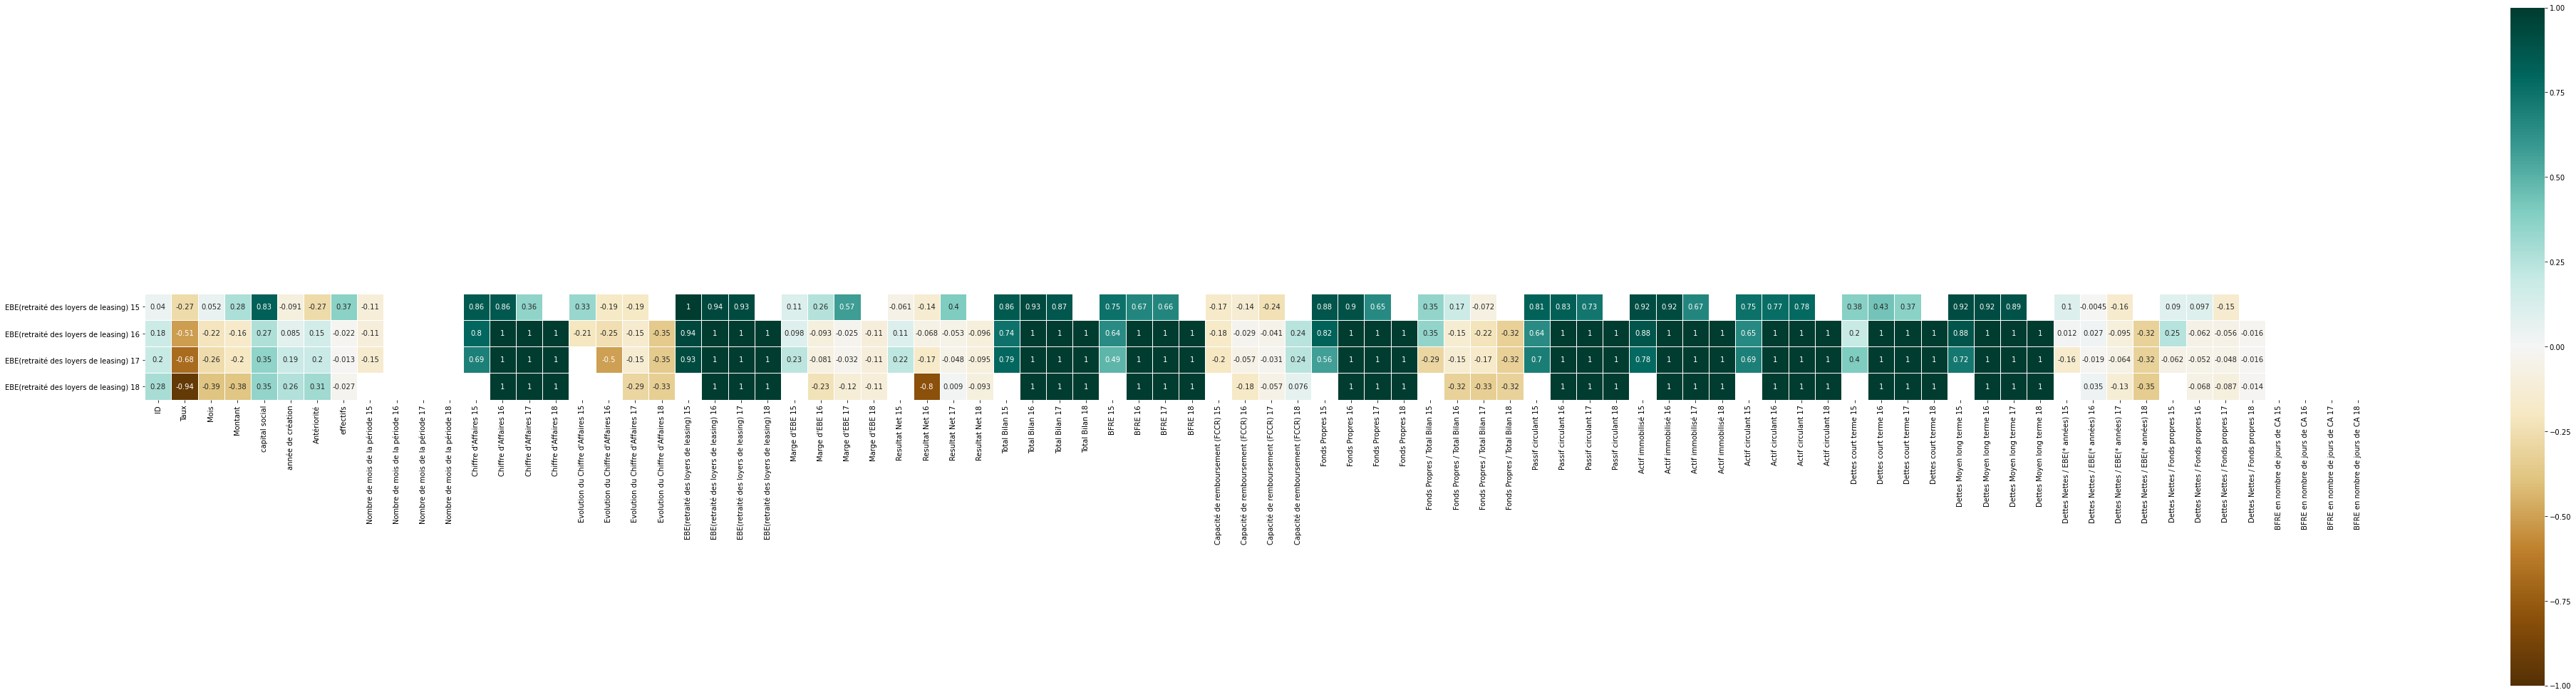

In [37]:
f , ax = plt.subplots(figsize=(70,35))
sns.heatmap(EBE_correlation,cmap='BrBG',annot=True,square=True,vmin=-1,vmax=1,\
            linewidths=0.5,cbar_kws={"shrink": .5})

==> "EBE(retraité des loyers de leasing) 15" is highly correlated to "Capital social", with coefficient of correlation equal to 0.83 .
==> "EBE(retraité des loyers de leasing) n" is highly correlated to "Taux", with coefficient of correlation which range from (-0.51) to (-0.94).

In [38]:
df = data[data["EBE(retraité des loyers de leasing) 15"].notna()]
df = df[df["capital social"].notna()]
Y= df["EBE(retraité des loyers de leasing) 15"].values
X = df["capital social"].values
X=X.reshape(-1,1)
mod_EB_CS = LinearRegression().fit(X,Y)

In [39]:
mod_EB_CS.coef_,mod_EB_CS.intercept_

(array([0.00055465]), 2311.5897466746446)

<font> <center> $\textrm {EBE(retraité des loyers de leasing) 15} = 2.24 *{10^-6} * \textrm{capital  social} + 4340.44 $     
    (1)

In [40]:
# Remplace missing values using the realation (1)
ind = np.where(data["EBE(retraité des loyers de leasing) 15"].isna()) [0]
for j in ind : 
    data.loc[j,"EBE(retraité des loyers de leasing) 15"] = mod_EB_CS.coef_[0] * data.loc[j,"capital social"] + mod_EB_CS.intercept_
    

In [41]:
X = []
Y = []
for n in range(16,19):
    df = data[data[f"EBE(retraité des loyers de leasing) {n}"].notna()]
    Y = df[f"EBE(retraité des loyers de leasing) {n}"].values
    X = df["Taux"].values
    X = X.reshape(-1,1)
    mod_EB_T = LinearRegression().fit(X,Y)
    ind = np.where(data[f"EBE(retraité des loyers de leasing) {n}"].isna()) [0]
    for j in ind : 
        data.loc[j,f"EBE(retraité des loyers de leasing) {n}"] = mod_EB_T.coef_[0] * data.loc[j,"Taux"] + mod_EB_T.intercept_

### Handling missing values related to yearly turnover :

In [42]:
# Display datas related to yearly turnover .
data[[ c for c in data.columns if "Chiffre d'Affaires" in c]]

,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Chiffre d'Affaires 17,Chiffre d'Affaires 18,Evolution du Chiffre d'Affaires 15,Evolution du Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 17,Evolution du Chiffre d'Affaires 18
0,NaN,NaN,NaN,NaN,NaN,NaN,48.17,44.36
1,NaN,NaN,NaN,NaN,NaN,NaN,10.38,30.22
2,NaN,NaN,NaN,NaN,NaN,NaN,37.55,7.21
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.81
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.08
...,...,...,...,...,...,...,...,...
504,12271.0,14591.0,NaN,NaN,0.06,18.91,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,59.18,NaN,NaN
506,2896.0,NaN,NaN,NaN,25.30,NaN,NaN,NaN
507,3191.0,3358.0,NaN,NaN,NaN,5.25,NaN,NaN


> In order to replace the missing values related to increase yearly turnover, we will use the following relationship :  

$\textrm{Evolution du chiffre d'affaire année (n)} =\frac{\textrm{chiffre d'affaire année n} -  \textrm{chiffre d'affaire année n-1}}{\textrm{chiffre d'affaire année (n-1)}}$ (2)


> In order to replace the missing values related to yearly turnover, we will use the relation (3) and the following relationships :  

   <font> <center> $\textrm{BFRE en nombre de jours de CA} = {\frac {\textrm{BFRE}}{\textrm{Chiffre d'Affaires}}} * 360 $     (3)
   
   <font> <center>$\textrm{Marge d'EBE} = {\frac {\textrm{EBE}}{\textrm{Chiffre d'Affaires}}} * 100 $ (4)

In [43]:
def impute_chiffre_affaire(i,n):
    """ This function allows to impute the value of the feature namely Chiffre d'affaire for 
        the year n
    """
    feature_name = f"Chiffre d'Affaires {n}"
    feature_n_1 = f"Chiffre d'Affaires {n-1}"
    feature_nplus1 = f"Chiffre d'Affaires {n+1}"
    find = False
    if n == 18 :
        if (not (pd.isna(data.loc[i,feature_n_1]))) and (not (pd.isna(data.loc[i,f"Evolution du Chiffre d'Affaires {n}"]))) :
           data.loc[i,feature_name] = (data.loc[i,f"Evolution du Chiffre d'Affaires {n}"] +1) * (data.loc[i,feature_n_1])
           find =True
    elif n == 15 :
        if ((not (pd.isna(data.loc[i,feature_nplus1]))) and (not (pd.isna(data.loc[i,f"Evolution du Chiffre d'Affaires {n+1}"])))) :
           data.loc[i,feature_name] = (data.loc[i,feature_nplus1])/(data.loc[i,f"Evolution du Chiffre d'Affaires {n+1}"] +1) 
           find =True
    else :
        if (not (pd.isna(data.loc[i,feature_n_1]))) and (not (pd.isna(data.loc[i,f"Evolution du Chiffre d'Affaires {n}"]))) :
           data.loc[i,feature_name] = (data.loc[i,f"Evolution du Chiffre d'Affaires {n}"] +1) * (data.loc[i,feature_n_1])
           find =True
        elif (not (pd.isna(data.loc[i,feature_nplus1]))) and (not (pd.isna(data.loc[i,f"Evolution du Chiffre d'Affaires {n+1}"]))) :
           data.loc[i,feature_name] = (data.loc[i,feature_nplus1])/(data.loc[i,f"Evolution du Chiffre d'Affaires {n+1}"] +1) 
           find =True
    if not find :
        if (not(pd.isna(data.loc[i,f"BFRE {n}"]))) and (not(pd.isna(data.loc[i,f"BFRE en nombre de jours de CA {n}"]))):
           data.loc[i,f"Chiffre d'Affaires {n}"] = math.abs( (data.loc[i,f"BFRE {n}"]/data.loc[i,f"BFRE en nombre de jours de CA {n}"]) * 360)
           find = True 
    if not find : 
        if (not(pd.isna(data.loc[i,f"Marge d'EBE {n}"]))) and (not(pd.isna(data.loc[i,f"EBE(retraité des loyers de leasing) {n}"]))):
            data.loc[i,f"Chiffre d'Affaires {n}"] = abs((data.loc[i,f"EBE(retraité des loyers de leasing) {n}"]/data.loc[i,f"Marge d'EBE {n}"])*100)
            find = True
            

In [44]:
# Impute missing values for the feature namely "Chiffre d'Affaires" 
for i in tqdm(range(15,19)):
    ind = np.where(data[f"Chiffre d\'Affaires {i}"].isna())[0]
    for j in ind :
        data.loc[j,f"Chiffre d\'Affaires {i}"] = impute_chiffre_affaire(j,i)

100%|██████████| 4/4 [00:00<00:00,  5.31it/s]


> For the rest of missing values related to "chiffre d'affaires" features. We will train model of linear regression between "chiffre d'affaires" features and "EBE" features which are highly correlated.

In [45]:
# Compute correlation between EBE and chiffre d'affaires for each year.
for n in range(15,19):
    corr = data[f"EBE(retraité des loyers de leasing) {n}"].corr(data[f"Chiffre d\'Affaires {n}"])
    print(f"Correlation between EBE and Chiffre d'affaires for the year {n} = {corr}")

Correlation between EBE and Chiffre d'affaires for the year 15 = -0.013506028518651268
Correlation between EBE and Chiffre d'affaires for the year 16 = 0.7224393381164342
Correlation between EBE and Chiffre d'affaires for the year 17 = 0.711684407902352
Correlation between EBE and Chiffre d'affaires for the year 18 = 0.8000456840746896


>==> This allow us to confirm that EBE and Chiffre d'affaires features are highly correlated, especially in the year 16,17,18 .

In [46]:
# we will use  the relation (6) to impute some values regardind chiffre d'affaires features
for n in range(16,19): 
    df = data[data[f"Chiffre d\'Affaires {n}"].notna()]
    Y = df[f"Chiffre d\'Affaires {n}"].values
    X = df[f"EBE(retraité des loyers de leasing) {n}"].values
    X = X.reshape(-1,1)
    model = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Chiffre d\'Affaires {n}"].isna())[0]
    for j in ind : 
        if (not pd.isna(data.loc[j,f"EBE(retraité des loyers de leasing) {n}"])) :
            data.loc[j,f"Chiffre d\'Affaires {n}"] = abs( model.intercept_ + model.coef_ * data.loc[j,f"EBE(retraité des loyers de leasing) {n}"])
       

>We will use  the relation (2)  to replace missing values for the Evolution du chiffre d'affaire feature .  

>Moreover we impute all the values of 15 by the values of the year 16 . We will consider that companies make the same increasing after a period of one year, since we don't have values of the year 14 in order to compute the exact values.

>Otherwhise , the rest of missing values will be replaced by the turnover increase of the year (n+1) or the year(n-1). We suppose always in short period , the turnover increase don't change a lot. 


In [47]:
    
def impute_evolution_chiffre_affaire(n):
    """ This function allow to impute missing values of the feature namely "Evolution du Chiffre d'Affaires"
        for the year n . """ 
    feature_name = f"Evolution du Chiffre d'Affaires {n}"
    chiffre_n = f"Chiffre d'Affaires {n}"
    chiffre_n_1 = f"Chiffre d'Affaires {n-1}"
    ind = np.where(data[feature_name].isna())[0]
    if n == 15 :
        for i in ind :
          data.loc[i,feature_name]=data.loc[i,"Evolution du Chiffre d'Affaires 16"]
    else :   
        for i in ind:
          if (not (np.isnan(data.loc[i,chiffre_n]))) and (not(np.isnan(data.loc[i,chiffre_n_1]))):
            data.loc[i,feature_name] =np.around((data.loc[i,chiffre_n]-data.loc[i,chiffre_n_1])/(data.loc[i,chiffre_n_1]))
          elif  n < 18 :
            if (not(pd.isna(data.loc[i,f"Evolution du Chiffre d'Affaires {n+1}"]))) :
                data.loc[i,feature_name] = data.loc[i,f"Evolution du Chiffre d'Affaires {n+1}"]
            elif n > 15 :
                if (not(pd.isna(data.loc[i,f"Evolution du Chiffre d'Affaires {n-1}"]))) :
                    data.loc[i,feature_name] = data.loc[i,f"Evolution du Chiffre d'Affaires {n-1}"]
            

In [48]:
# Impute missing values for the feature namely "Evolution du Chiffre d'Affaires" 
impute_evolution_chiffre_affaire(18)
impute_evolution_chiffre_affaire(17)
impute_evolution_chiffre_affaire(16)
impute_evolution_chiffre_affaire(15)

In [49]:
data["Evolution du Chiffre d\'Affaires 16"].notna().sum()

509

In [50]:
# the aplly of the function impute_chiffre_affaire at the feature "Chiffre d\'Affaires 15" ,
# can now replace all the missing values about this feature, since we all the others values of
# the following years.
ind = np.where(data[f"Chiffre d\'Affaires 15"].isna())[0]
for j in ind :
    feature_nplus1 = "Chiffre d\'Affaires 16"
    feature_name = "Chiffre d\'Affaires 15"
    if ((not (pd.isna(data.loc[j,feature_nplus1]))) and (not (pd.isna(data.loc[j,f"Evolution du Chiffre d'Affaires 16"])))) :
           data.loc[j,feature_name] = (data.loc[j,feature_nplus1])/(data.loc[j,f"Evolution du Chiffre d'Affaires {16}"] +1) 
           
    #"data.loc[j,f"Chiffre d\'Affaires 15"] = impute_chiffre_affaire(j,15)

### Handling missing values related to Marge d'EBE features:

> Henceforth, The relation (4) and the previous handling of missing values related to "Chiffre d'affaires" features and "EBE" features, allow us to treat all the missing values of the features related to "Marge d'EBE".

In [51]:
for n in range(15,19): 
    ind = np.where(data[f"Marge d\'EBE {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Marge d\'EBE {n}"] = (data.loc[j,f"EBE(retraité des loyers de leasing) {n}"]/data.loc[j,f"Chiffre d\'Affaires {n}"])*100

### Handling missing values related to BFR:

In [52]:
for n in range(15,19) :
    corr = data[f"BFRE {n}"].corr(data[f"Chiffre d\'Affaires {n}"])
    print(f"Correlation between BFR and Chiffre d'affaires for the year {n} = {corr}")

Correlation between BFR and Chiffre d'affaires for the year 15 = 0.15220752430231166
Correlation between BFR and Chiffre d'affaires for the year 16 = 0.9907692644385356
Correlation between BFR and Chiffre d'affaires for the year 17 = 0.9938915992442375
Correlation between BFR and Chiffre d'affaires for the year 18 = 0.9919422948676864


> The above results, show that BFR is highly correlated to Chiffre d'affaires by about 100% in the most of years . Therefore, we will use this results in order to replaces missing values for features related to BFR.

In [53]:
for n in range(15,19):
  df = data[data[f"BFRE {n}"].notna()]
  X = df[f"Chiffre d\'Affaires {n}"].values
  X = X.reshape(-1,1)
  Y = df[f"BFRE {n}"].values
  md = LinearRegression().fit(X,Y)
  ind = np.where(data[f"BFRE {n}"].isna())[0]
  for j in ind : 
        data.loc[j,f"BFRE {n}"] = md.coef_[0] * data.loc[j,f"Chiffre d\'Affaires {n}"] + md.intercept_


In [54]:
# We will use now , the relation (3) to replaces missing values of the feature "BFRE en nombre de jours de CA".
for n in range(15,19) :
    ind = np.where(data[f"BFRE en nombre de jours de CA {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"BFRE en nombre de jours de CA {n}"] = (data.loc[j,f"BFRE {n}"] / data.loc[j,f"Chiffre d\'Affaires {n}"])*360

### Handling missing values related to Actif circulant:

In [55]:
for  n in range(15,19) :
    corr= data[f"Actif circulant {n}"].corr(data[f"BFRE {n}"])
    print (f"The coefficient of correlation between Actif circulant and BFRE for the year {n} = {corr}")

The coefficient of correlation between Actif circulant and BFRE for the year 15 = 0.8844739000781767
The coefficient of correlation between Actif circulant and BFRE for the year 16 = 0.996634562497763
The coefficient of correlation between Actif circulant and BFRE for the year 17 = 0.9958036347551825
The coefficient of correlation between Actif circulant and BFRE for the year 18 = 0.9912740721727834


> ==> We notice from the above results , that the Actif circulant is highly correlated to BFRE for all  years . This correlation are roughly 100 %. Thus we fetch hereunder to relation that link theses two features per year. 

In [56]:
for n in range(15,19) :
    df = data[data[f"Actif circulant {n}"].notna()]
    X = df[f"BFRE {n}"].values
    X = X.reshape(-1,1)
    Y = df[f"Actif circulant {n}"].values
    md = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Actif circulant {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Actif circulant {n}"] = max(0,md.coef_[0] * data.loc[j,f"BFRE {n}"] + md.intercept_)

### Handling missing values related to Actif mobilisé:

In [57]:
for  n in range(15,19) :
    corr= data[f"Actif immobilisé {n}"].corr(data[f"BFRE {n}"])
    print (f"The coefficient of correlation between Actif immobilisé and BFRE for the year {n} = {corr}")

The coefficient of correlation between Actif immobilisé and BFRE for the year 15 = 0.6731981072155562
The coefficient of correlation between Actif immobilisé and BFRE for the year 16 = 0.9976723757537198
The coefficient of correlation between Actif immobilisé and BFRE for the year 17 = 0.9962270570853552
The coefficient of correlation between Actif immobilisé and BFRE for the year 18 = 0.9914876381481674


> ==> We notice from the above results , that the Actif immobilisé is highly correlated to BFRE for all  years . This correlation are roughly 100 % for most years. Thus we fetch hereunder to relation that link theses two features per year. 

In [58]:
for n in range(15,19) :
    df = data[data[f"Actif immobilisé {n}"].notna()]
    X = df[f"BFRE {n}"].values
    X = X.reshape(-1,1)
    Y = df[f"Actif immobilisé {n}"].values
    md = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Actif immobilisé {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Actif immobilisé {n}"] = max(0,md.coef_[0] * data.loc[j,f"BFRE {n}"] + md.intercept_)

### Handling missing values related to Total Bilan:

> To impute missing values of the feature namely "Total Bilan", we will use the following relationship : 

  <font> <center> $\textrm{Total Bilan} = \textrm{Actif circulant} + \textrm{Actif immobilisé} $ (5)

In [59]:
for n in range(15,19) :
    ind = np.where(data[f"Total Bilan {n}"].isna())[0]
    for j in ind:
        data.loc[j,f"Total Bilan {n}"] = data.loc[j,f"Actif circulant {n}"] + data.loc[j,f"Actif immobilisé {n}"]

### Handling missing values related to Fonds Propres:

In [60]:
for  n in range(15,19) :
    corr= data[f"Fonds Propres {n}"].corr(data[f"BFRE {n}"])
    print (f"The coefficient of correlation between Fonds Propres and BFRE for the year {n} = {corr}")

The coefficient of correlation between Fonds Propres and BFRE for the year 15 = 0.4914680134863859
The coefficient of correlation between Fonds Propres and BFRE for the year 16 = 0.9620700050561923
The coefficient of correlation between Fonds Propres and BFRE for the year 17 = 0.9597820498648608
The coefficient of correlation between Fonds Propres and BFRE for the year 18 = 0.9916648258340391


> ==> We notice from the above results , that the Fonds Propres is highly correlated to BFRE for all  years . This correlation are roughly 100 % for most years. Thus we fetch hereunder to relation that link theses two features per year. 

In [61]:
for n in range(15,19) :
    df = data[data[f"Fonds Propres {n}"].notna()]
    X = df[f"BFRE {n}"].values
    X = X.reshape(-1,1)
    Y = df[f"Fonds Propres {n}"].values
    md = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Fonds Propres {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Fonds Propres {n}"] = abs(md.coef_[0] * data.loc[j,f"BFRE {n}"] + md.intercept_)

### Handling missing values related to Passif circulant:

In [62]:
for  n in range(15,19) :
    corr= data[f"Passif circulant {n}"].corr(data[f"BFRE {n}"])
    print (f"The coefficient of correlation between Passif circulant and BFRE for the year {n} = {corr}")

The coefficient of correlation between Passif circulant and BFRE for the year 15 = 0.8308998408905465
The coefficient of correlation between Passif circulant and BFRE for the year 16 = 0.9972059800173606
The coefficient of correlation between Passif circulant and BFRE for the year 17 = 0.9947572875346931
The coefficient of correlation between Passif circulant and BFRE for the year 18 = 0.9912967246242165


> ==> We notice from the above results , that the Passif circulant is highly correlated to BFRE for all  years . This correlation are roughly 100 % for most years. Thus we fetch hereunder to relation that link theses two features per year. 

In [63]:
for n in range(15,19) :
    df = data[data[f"Passif circulant {n}"].notna()]
    X = df[f"BFRE {n}"].values
    X = X.reshape(-1,1)
    Y = df[f"Passif circulant {n}"].values
    md = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Passif circulant {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Passif circulant {n}"] = max(0,md.coef_[0] * data.loc[j,f"BFRE {n}"] + md.intercept_)

### Handling missing values related to "Fonds Propres / Total Bilan" :

In [64]:
for n in range(15,19):
    ind = np.where(data[f"Fonds Propres / Total Bilan {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Fonds Propres / Total Bilan {n}"] = (data.loc[j,f"Fonds Propres {n}"]/data.loc[j,f"Total Bilan {n}"])*100

### Handling missing values related to "Dettes court terme" :

In [65]:
for  n in range(15,19) :
    corr= data[f"Dettes court terme {n}"].corr(data[f"Passif circulant {n}"])
    print (f"The coefficient of correlation between Dettes court terme and Passif circulant for the year {n} = {corr}")

The coefficient of correlation between Dettes court terme and Passif circulant for the year 15 = 0.7870687873001767
The coefficient of correlation between Dettes court terme and Passif circulant for the year 16 = 0.998586338521553
The coefficient of correlation between Dettes court terme and Passif circulant for the year 17 = 0.99996027424991
The coefficient of correlation between Dettes court terme and Passif circulant for the year 18 = 0.9999808564553356


> ==> We notice from the above results , that the Dettes court terme is highly correlated to Passif circulant for all  years . This correlation are roughly 100 % for most years. Thus we fetch hereunder to relation that link theses two features per year. 

In [66]:
for n in range(15,19) :
    df = data[data[f"Dettes court terme {n}"].notna()]
    X = df[f"Passif circulant {n}"].values
    X = X.reshape(-1,1)
    Y = df[f"Dettes court terme {n}"].values
    md = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Dettes court terme {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Dettes court terme {n}"] = md.coef_[0] * data.loc[j,f"Passif circulant {n}"] + md.intercept_

### Handling missing values related to "Dettes Moyen long terme" :

In [67]:
for  n in range(15,19) :
    corr= data[f"Dettes Moyen long terme {n}"].corr(data[f"Passif circulant {n}"])
    print (f"The coefficient of correlation between Dettes Moyen long terme and Passif circulant for the year {n} = {corr}")

The coefficient of correlation between Dettes Moyen long terme and Passif circulant for the year 15 = 0.6844146308796307
The coefficient of correlation between Dettes Moyen long terme and Passif circulant for the year 16 = 0.9999814813248511
The coefficient of correlation between Dettes Moyen long terme and Passif circulant for the year 17 = 0.9991717556168277
The coefficient of correlation between Dettes Moyen long terme and Passif circulant for the year 18 = 0.9999889654311052


> ==> We notice from the above results , that the Dettes Moyen long terme is highly correlated to Passif circulant for all  years . This correlation are roughly 100 % for most years. Thus we fetch hereunder to relation that link theses two features per year.

In [68]:
for n in range(15,19) :
    df = data[data[f"Dettes Moyen long terme {n}"].notna()]
    X = df[f"Passif circulant {n}"].values
    X = X.reshape(-1,1)
    Y = df[f"Dettes Moyen long terme {n}"].values
    md = LinearRegression().fit(X,Y)
    ind = np.where(data[f"Dettes Moyen long terme {n}"].isna())[0]
    for j in ind :
        data.loc[j,f"Dettes Moyen long terme {n}"] = md.coef_[0] * data.loc[j,f"Passif circulant {n}"] + md.intercept_

### Handling missing values related to "Dettes Nettes / EBE(* années)" :

In [69]:
for  n in range(15,19) :
    ind = np.where(data[f"Dettes Nettes / EBE(* années) {n}"].isna())[0]
    for j in ind : 
        data.loc[j,f"Dettes Nettes / EBE(* années) {n}"] = (data.loc[j,f"Dettes court terme {n}"] + data.loc[j,f"Dettes Moyen long terme {n}"])/(data.loc[j,f"EBE(retraité des loyers de leasing) {n}"])

### Handling missing values related to "Resultat Net" :

In [70]:
# compute the number or rows where "Resultat net " values , are missing for all years.
n = 0 
for i in range(len(data)) :
    exit = False 
    for j in range(15,19) :
        if not pd.isna(data.loc[i,f"Resultat Net {j}"]):
            exit = True
    if not exit :
        n += 1

In [71]:
print(f"Number of rows where 'Resultat net' missing values, are missing for all years equal to\
 {n}")

Number of rows where 'Resultat net' missing values, are missing for all years equal to 111


> When we use the above exploration and we consider that "Resultat Net" can not change a lot in short period . We can impute each missing values of "Resultat Net" by the near year value from  (15,16,17,18). 

In [72]:
for n in range(15,19) :
    ind = np.where(data[f"Resultat Net {n}"].isna())[0]
    for i in ind :
        find = False
        if n < 18 :
           if not pd.isna(data.loc[i,f"Resultat Net {n+1}"]):
              data.loc[i,f"Resultat Net {n}"] = data.loc[i,f"Resultat Net {n+1}"]
              find = True
        if n > 15 :
           if not pd.isna(data.loc[i,f"Resultat Net {n-1}"]) :
              data.loc[i,f"Resultat Net {n}"] = data.loc[i,f"Resultat Net {n-1}"]
              find = True 
        if not find : 
           for k in range(15,19) :
               if not pd.isna(data.loc[i,f"Resultat Net {k}"]) :
                  data.loc[i,f"Resultat Net {n}"] = data.loc[i,f"Resultat Net {k}"]
                  break

In [73]:
# Display missing values for the "Resultat Net" feature after the processing.
data[["Resultat Net 15","Resultat Net 16","Resultat Net 17","Resultat Net 18"]].isna().sum()

Resultat Net 15    111
Resultat Net 16    111
Resultat Net 17    111
Resultat Net 18    111
dtype: int64

> As it is mentionned before , the above treatments can not handle all the missing values, related to the Resultat Net. So, for the rest of missing values, we will impute them by the average of "Resultat Net" achieved by comapnies of the same country.

In [74]:
for n in range(15,19):
    ind = np.where(data[f"Resultat Net {n}"].isna())
    for i in ind :
        country = data.loc[int(i[0]),"Pays"]
        df = data[data["Pays"]==str(country)]
        dff = df[df[f"Resultat Net {n}"].notna()]
        val = dff[f"Resultat Net {n}"].mean()
        data.loc[i,f"Resultat Net {n}"] = val 

In [75]:
data[["Resultat Net 15","Resultat Net 16","Resultat Net 17","Resultat Net 18"]].isna().sum()

Resultat Net 15    0
Resultat Net 16    0
Resultat Net 17    0
Resultat Net 18    0
dtype: int64

### Handling missing values related to "Capacité de remboursement (FCCR)" :

> To handle missing values related to "Capacité de remboursement (FCCR)" features , we will use the following relationship :  

<font> <center> $\textrm{Capacité de remboursement (FCCR)} = {\frac {\textrm{Resultat Net}}{\textrm{Dettes court terme + Dettes Moyen long terme}}}  $   (6)

In [76]:
for n in range(15,19):
    ind = np.where(data[f"Capacité de remboursement (FCCR) {n}"].isna())
    for j in ind :
        dc = data.loc[j,f"Dettes court terme {n}"]
        dmlt = data.loc[j,f"Dettes Moyen long terme {n}"]
        rn = data.loc[j,f"Resultat Net {n}"]
        data.loc[j,f"Capacité de remboursement (FCCR) {n}"] = (rn)/(dc+dmlt)

### Handling missing values related to "Dettes Nettes / Fonds propres " :

In [77]:
for n in range(15,19) : 
    ind = np.where(data[f"Dettes Nettes / Fonds propres {n}"].isna())
    for j in ind : 
        dc = data.loc[j,f"Dettes court terme {n}"]
        dmlt = data.loc[j,f"Dettes Moyen long terme {n}"]
        fp = data.loc[j,f"Fonds Propres {n}"]
        data.loc[j,f"Dettes Nettes / Fonds propres {n}"] = (dc+dmlt)/fp

### Handling  others missing values :

> We consider that features related to " Nombre de mois de la période" are not important four our downstream task.Indeed theses values are generally equal to 12 . So we will remove all columns related to theses features.

In [78]:
for n in range(15,19):  
    del (data[f"Nombre de mois de la période {n}"])

In [79]:
data.dropna(inplace=True)

# 2. Exploration data analysis:

## 2.1 Quantitative variables:

> In this part , we will perform data explorations between variables in order to get insights and varibles which are related to our target which is "Taux" feature.

> In our Hereunder analysis, we will assemble our features feaures by group. It means, in each iteration, we perform multivariate analysis between group of similar features  with the target feature "Taux". In the first, step we will start with the group, who encompass features which apparently not similair.

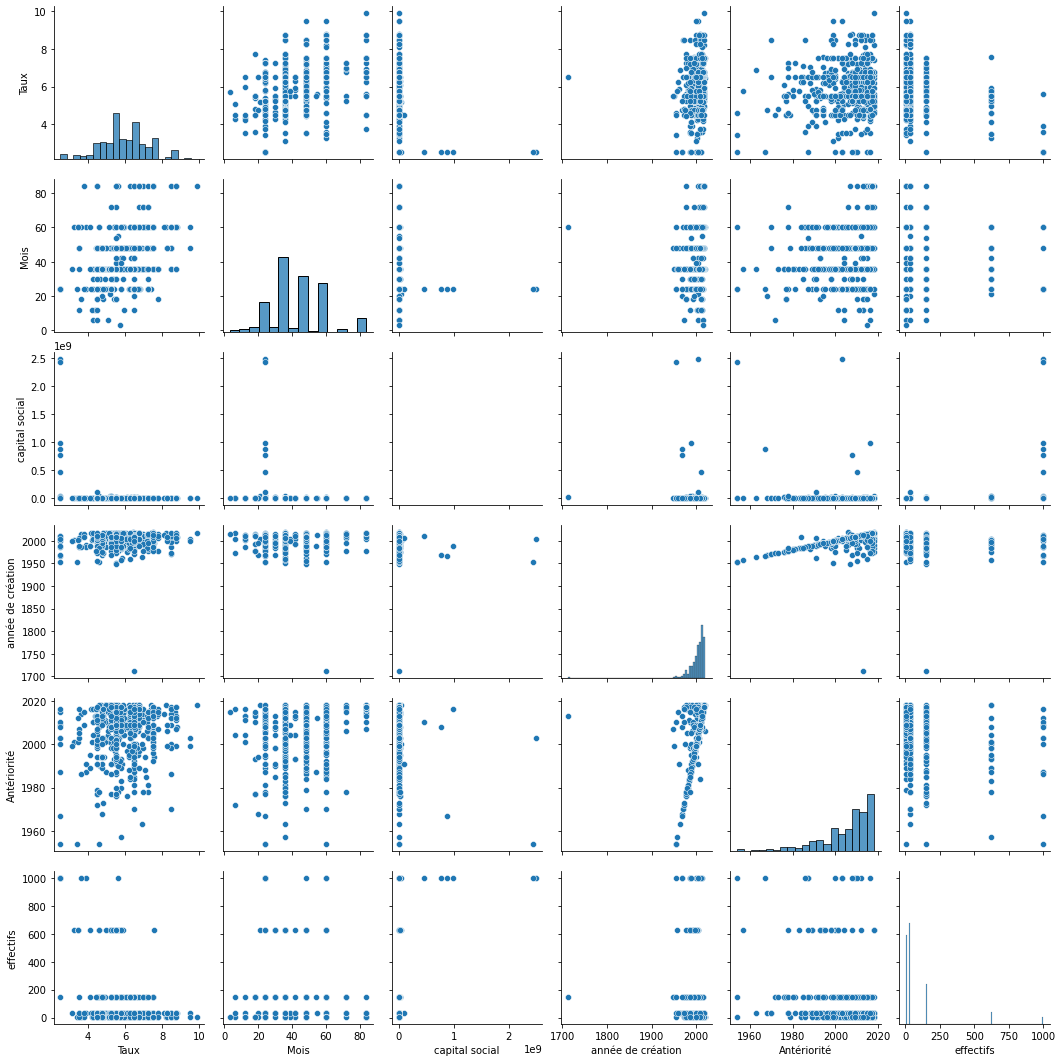

In [80]:
# Multivariate analysis between "Taux" and group of features apparently not similar
sns.pairplot(data[["Taux","Mois","capital social","année de création","Antériorité","effectifs"]])

==> The charte above don't show any important relationship between the analysed features. So let's advance !

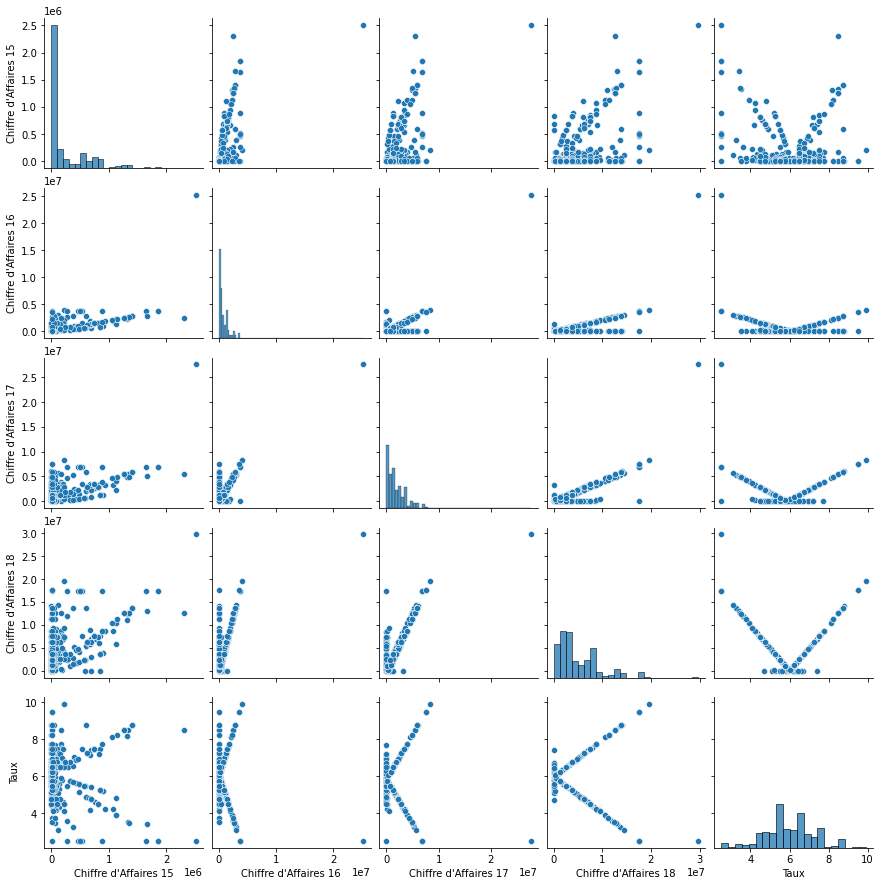

In [81]:
# Multivariate analysis between "Taux" and group of Chiffre d'Affaires features.
sns.pairplot(data[[f"Chiffre d'Affaires {n}" for n in range(15,19)] +["Taux"]])

===> As it'is shown in the chat above . It'is obvious that the turnover of year n , is highly correlated to others yeras, especially with are which are very close to it.

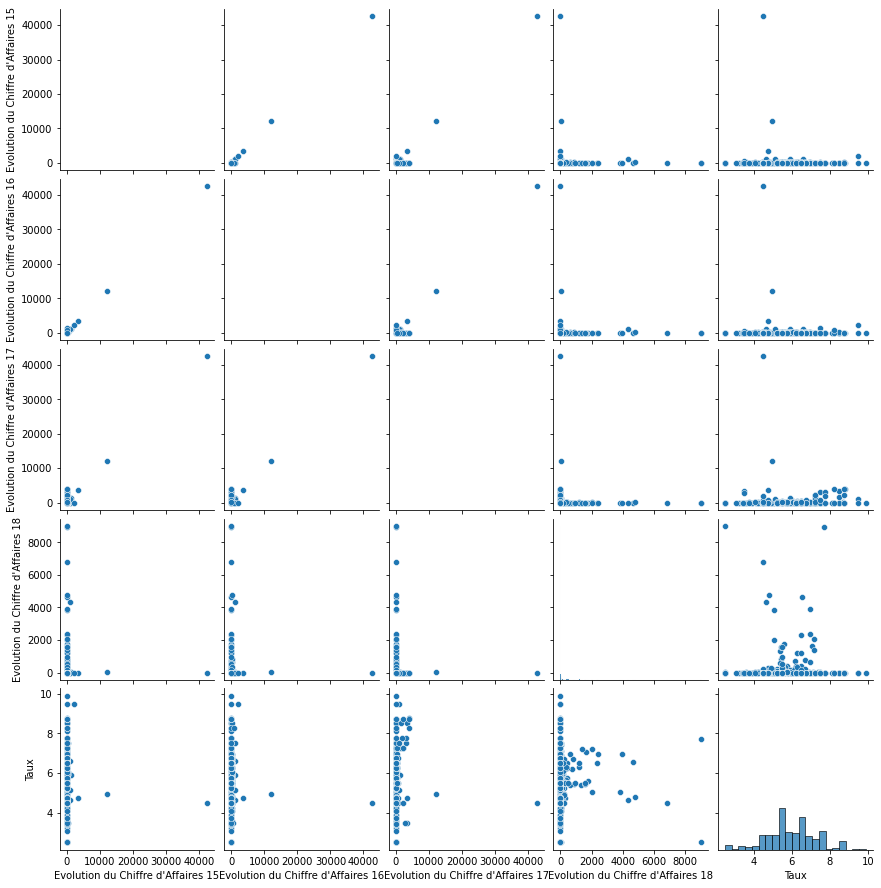

In [82]:
# Multivariate analysis between "Taux" and group of Evolution du Chiffre d'Affaires features.
sns.pairplot(data[[f"Evolution du Chiffre d'Affaires {n}" for n in range(15,19)] +["Taux"]])

==> The charte above don't show any important relationship between the analysed features. So let's advance !

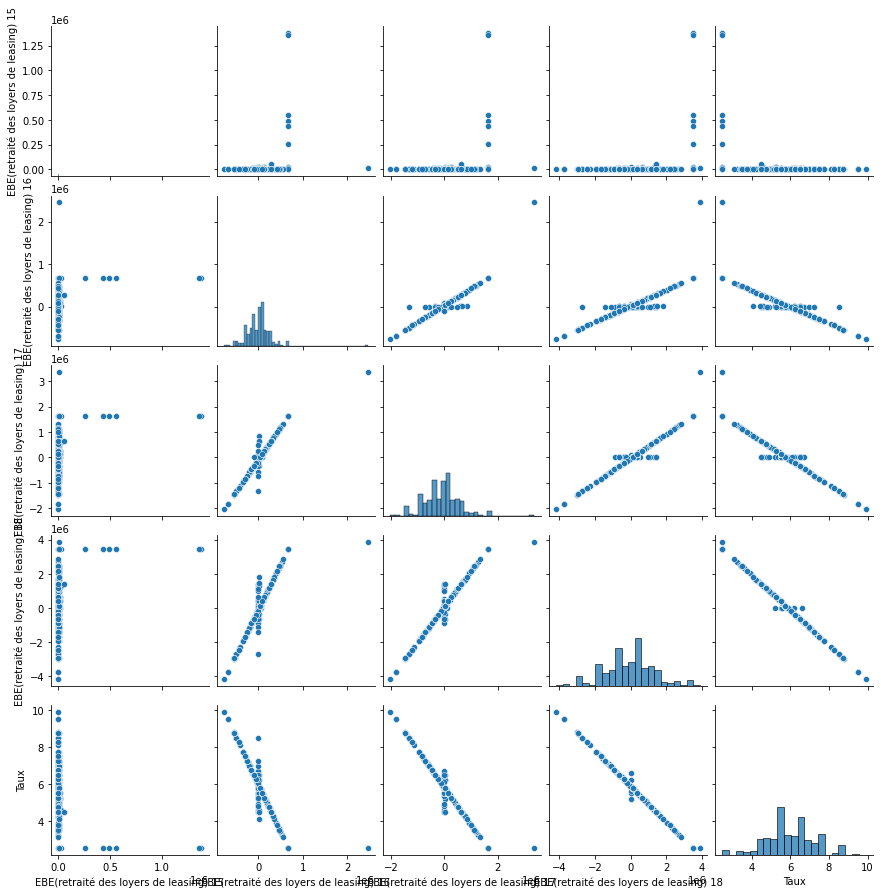

In [83]:
# Multivariate analysis between "Taux" and group of EBE features.
sns.pairplot(data[[f"EBE(retraité des loyers de leasing) {n}" for n in range(15,19)] +["Taux"]])

===> The analyse above show a high negative correlation between EBE features and "Taux" Features.

### <font color=redblue> Insight 1 : The interest rate is negatively correlated to EBE. it means the interset rate increase when EBE is small or negative and the reverse is true. </font>

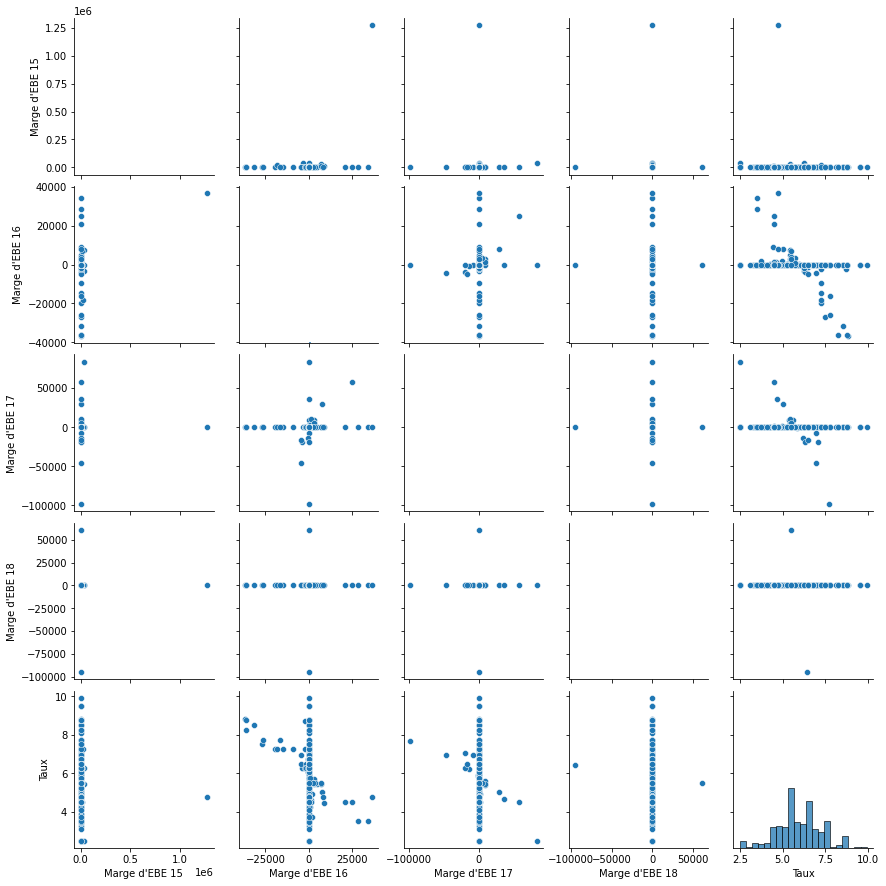

In [84]:
# Multivariate analysis between "Taux" and group of Marge d'EBE features.
sns.pairplot(data[[f"Marge d'EBE {n}" for n in range(15,19)] +["Taux"]])

==> The charte above don't show any important relationship between the analysed features.

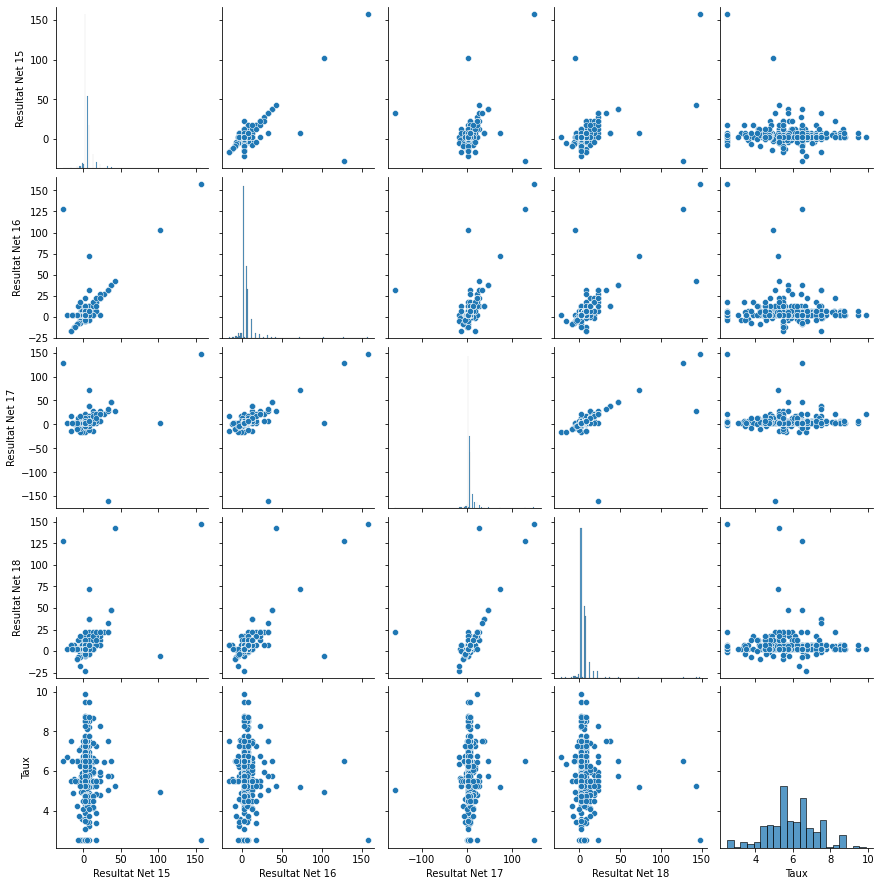

In [85]:
# Multivariate analysis between "Taux" and group of Resultat Net features.
sns.pairplot(data[[f"Resultat Net {n}" for n in range(15,19)] +["Taux"]])

> ===> Apart the expected corelation between Resultat Net of years wich each other. The chart above don't show any others important relationship.

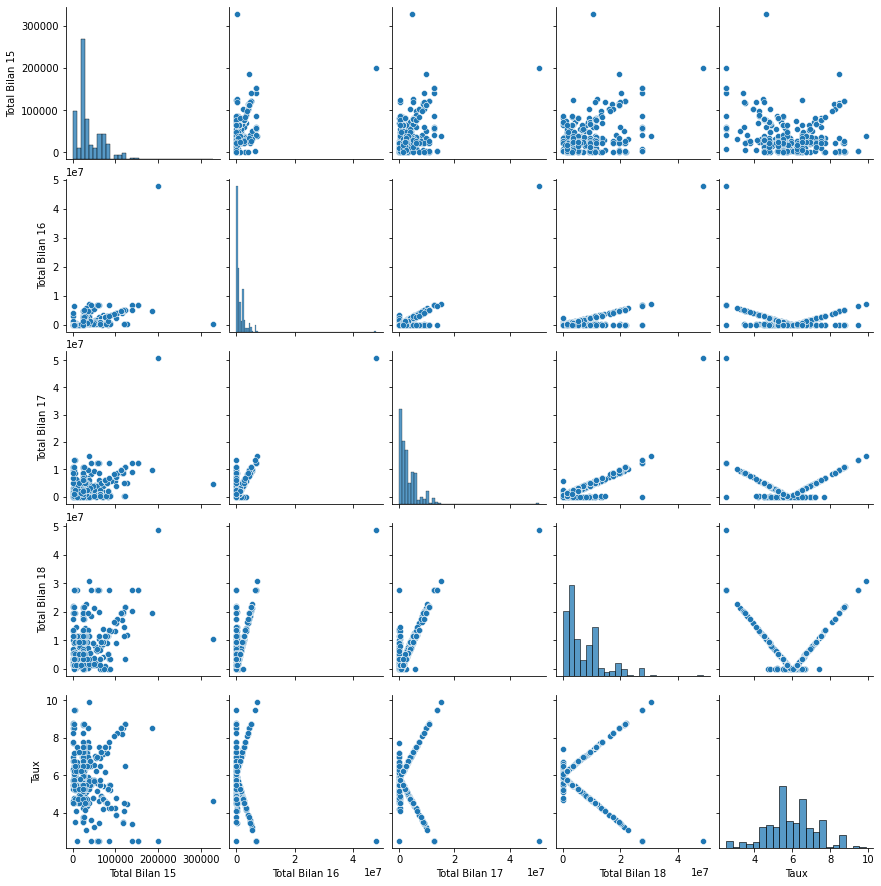

In [86]:
# Multivariate analysis between "Taux" and group of Total Bilan features.
sns.pairplot(data[[f"Total Bilan {n}" for n in range(15,19)] +["Taux"]])

> ===> Apart the expected corelation between Total Bilan of years wich each other. The chart above don't show any others important relationship.

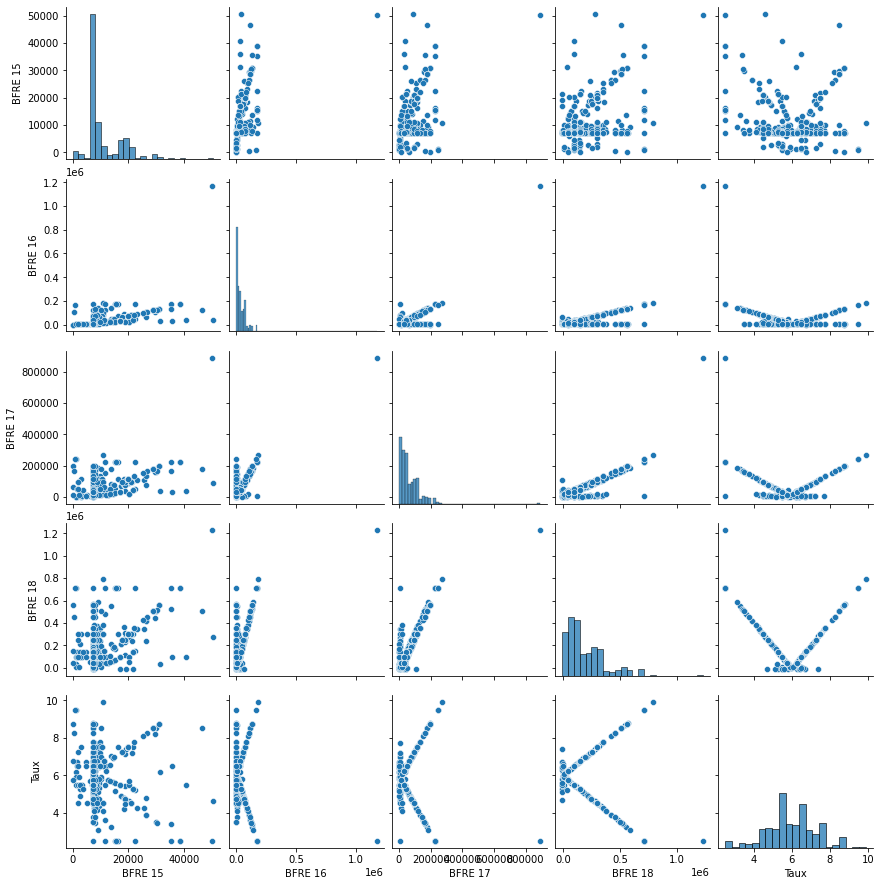

In [87]:
# Multivariate analysis between "Taux" and group of BFRE features.
sns.pairplot(data[[f"BFRE {n}" for n in range(15,19)] +["Taux"]])

==> The charte above don't show any important relationship between the analysed features.

In [88]:
gc.collect()

1154

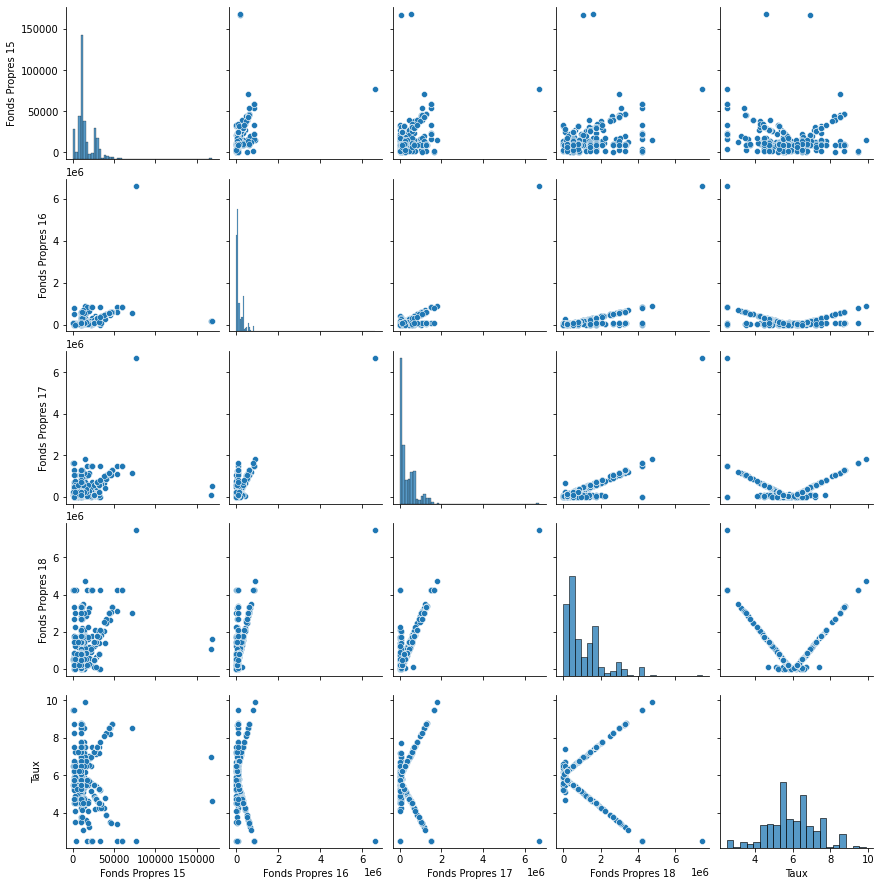

In [89]:
# Multivariate analysis between "Taux" and group of Fonds Propres features.
sns.pairplot(data[[f"Fonds Propres {n}" for n in range(15,19)] +["Taux"]])

==> The charte above don't show any important relationship between the analysed features.

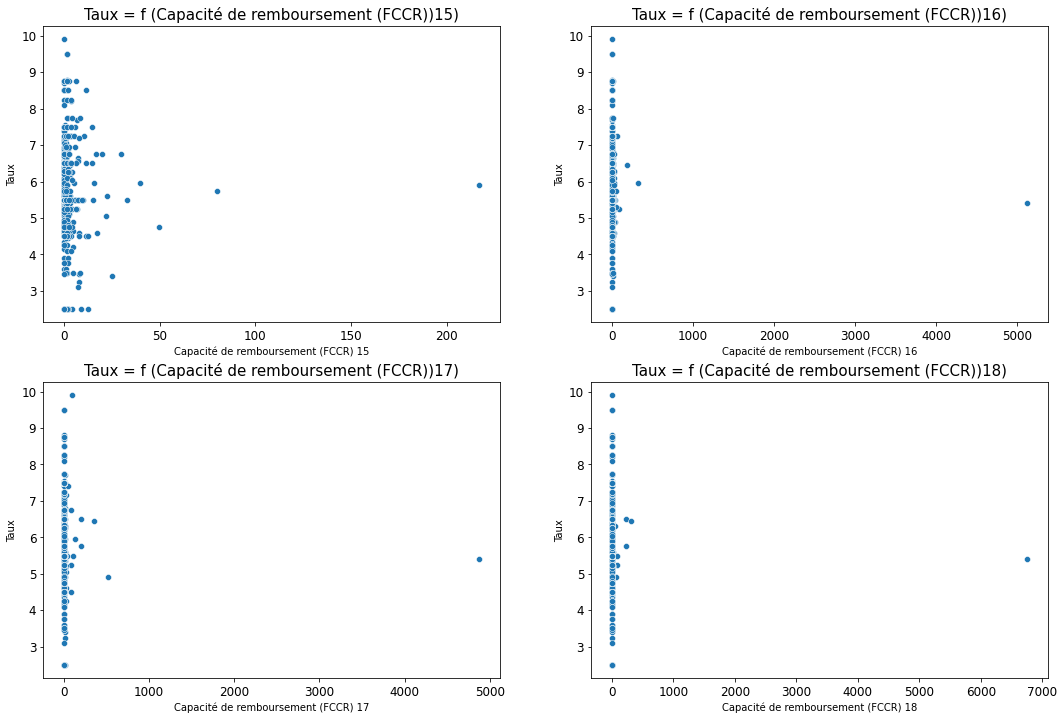

In [90]:
# Multivariate analysis between "Taux" and group of Capacité de remboursement (FCCR) features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Capacité de remboursement (FCCR) {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Capacité de remboursement (FCCR)){i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

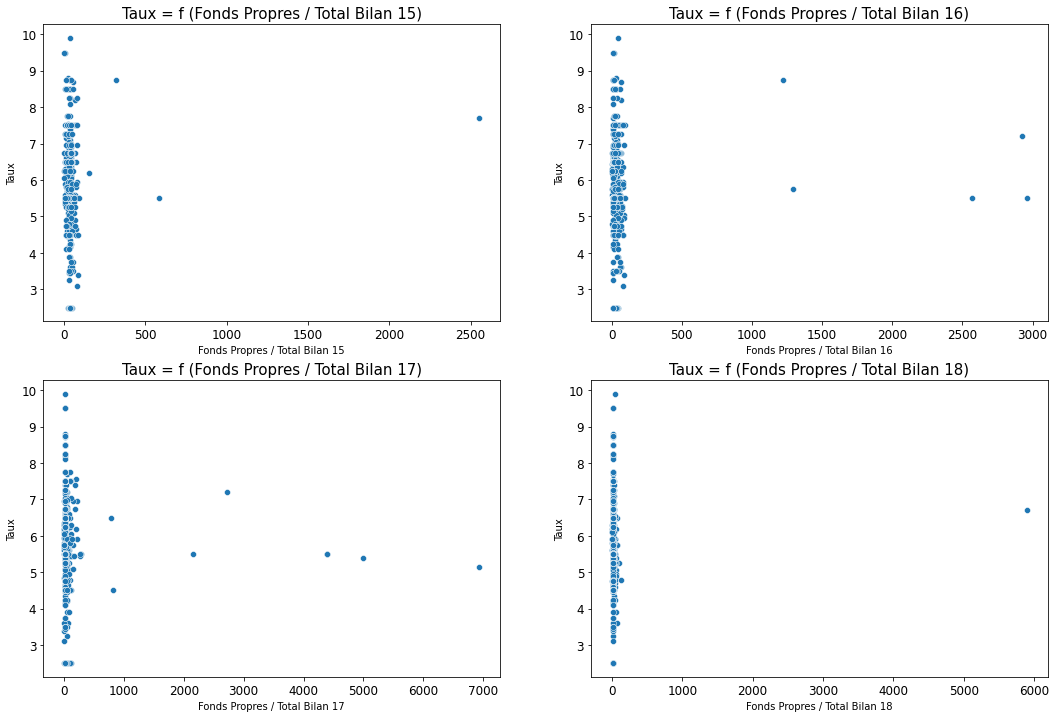

In [91]:
# Multivariate analysis between "Taux" and group of Fonds Propres / Total Bilan features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Fonds Propres / Total Bilan {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Fonds Propres / Total Bilan {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

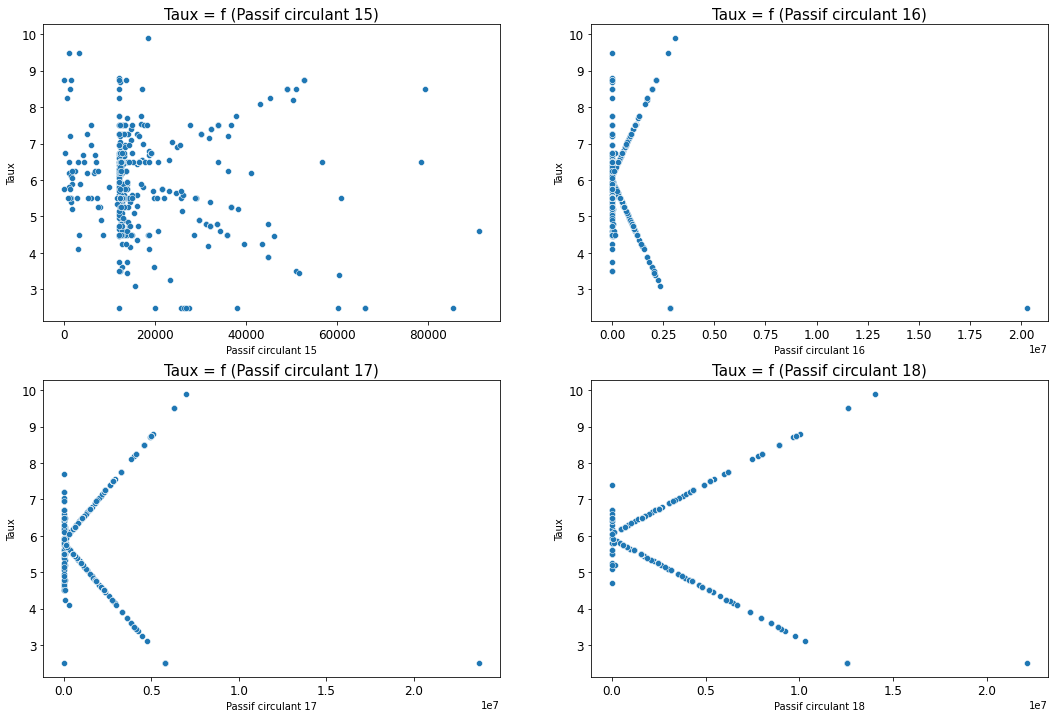

In [92]:
# Multivariate analysis between "Taux" and group of Passif circulant features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Passif circulant {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Passif circulant {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

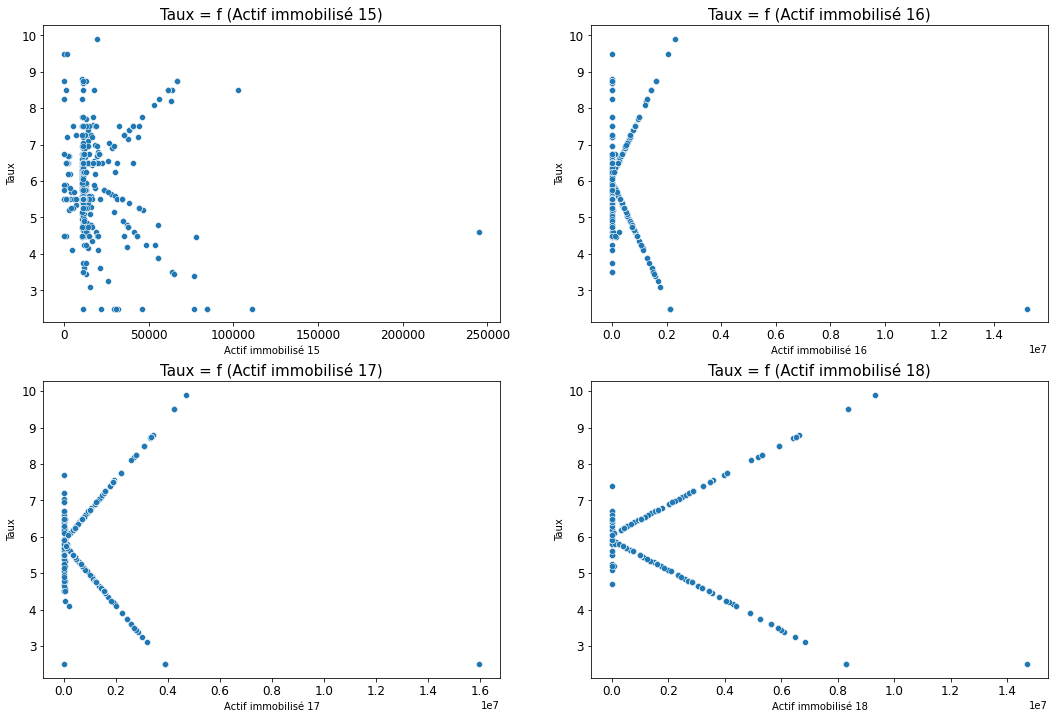

In [93]:
# Multivariate analysis between "Taux" and group of Actif immobilisé features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Actif immobilisé {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Actif immobilisé {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

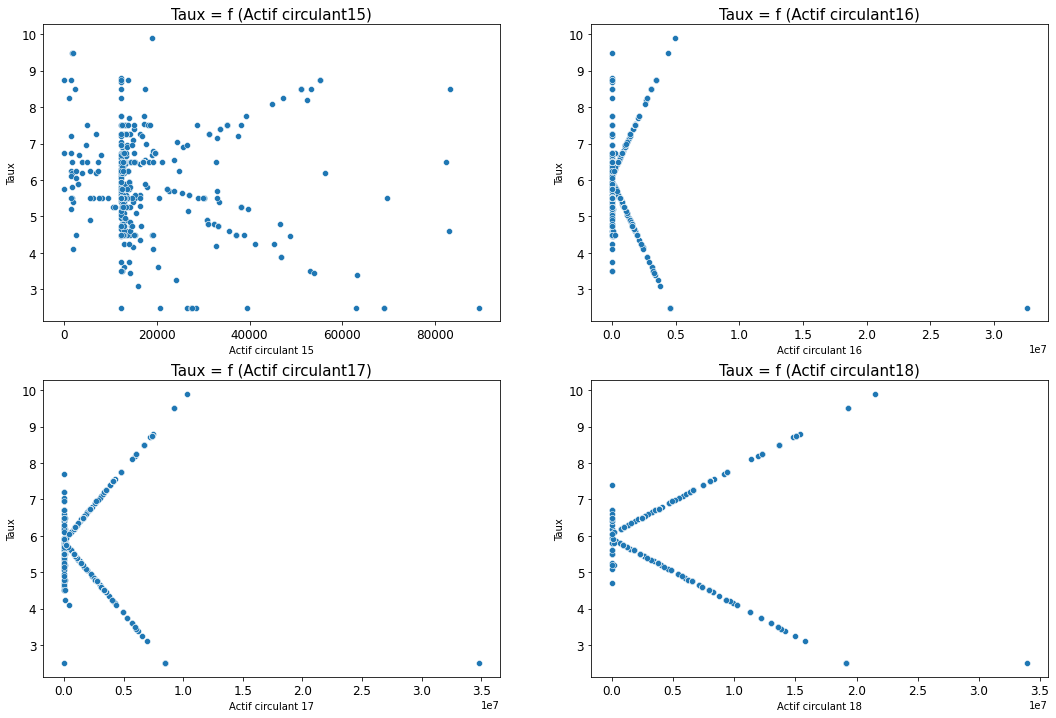

In [94]:
# Multivariate analysis between "Taux" and group of Actif circulant features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Actif circulant {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Actif circulant{i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

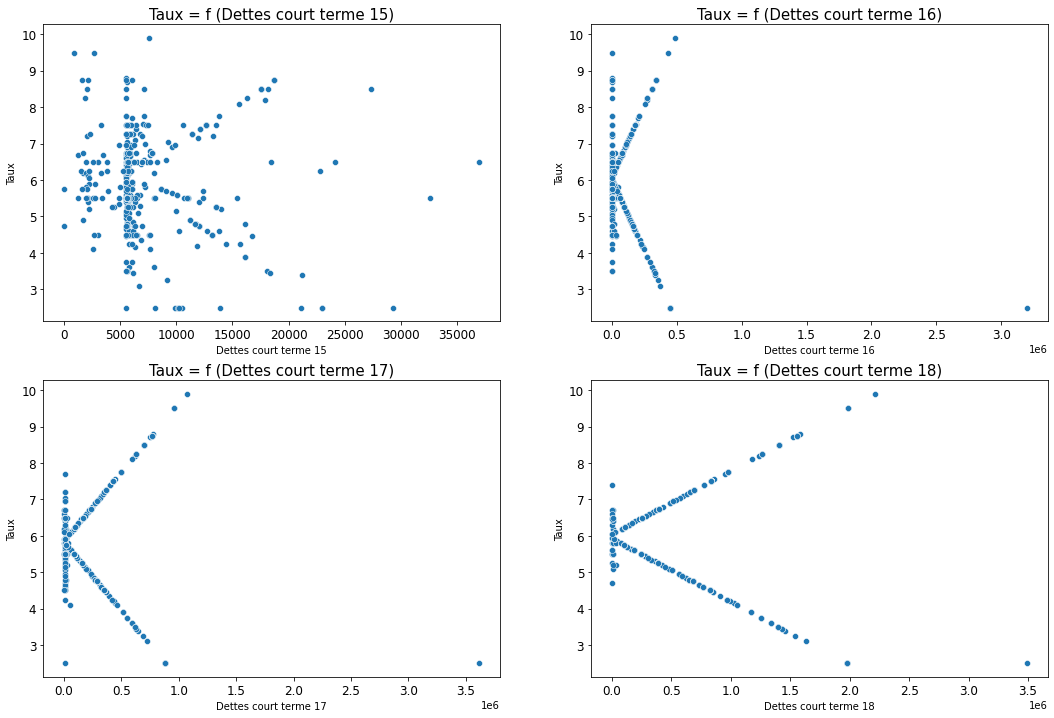

In [95]:
# Multivariate analysis between "Taux" and group of Dettes court termefeatures.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Dettes court terme {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Dettes court terme {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

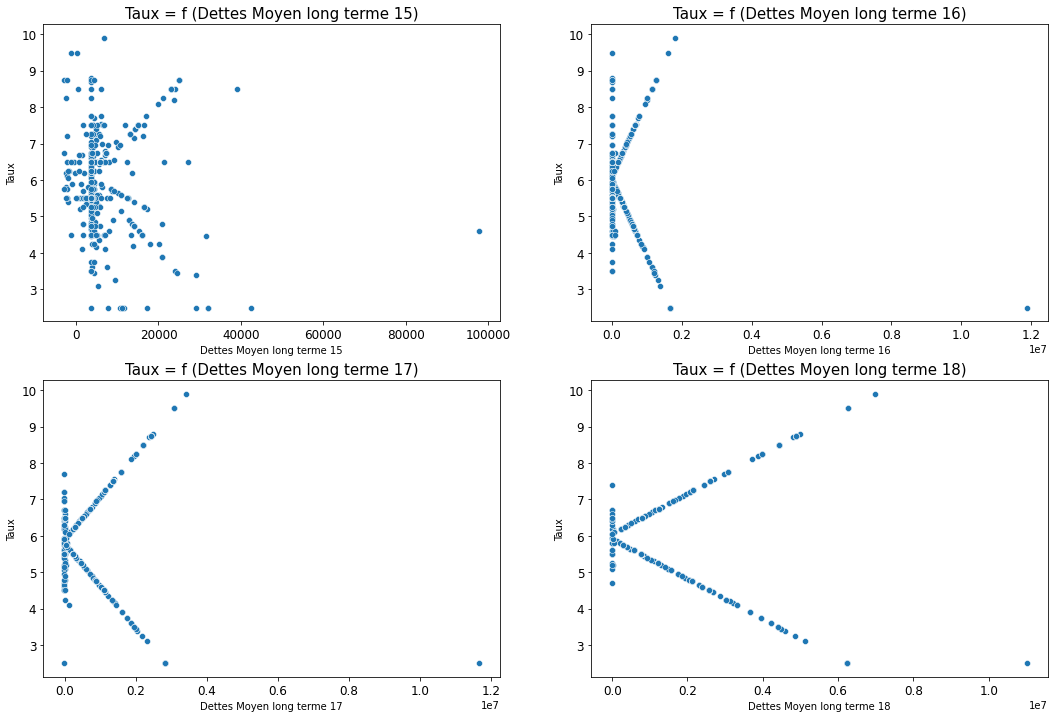

In [96]:
# Multivariate analysis between "Taux" and group of Dettes Moyen long terme features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Dettes Moyen long terme {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Dettes Moyen long terme {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

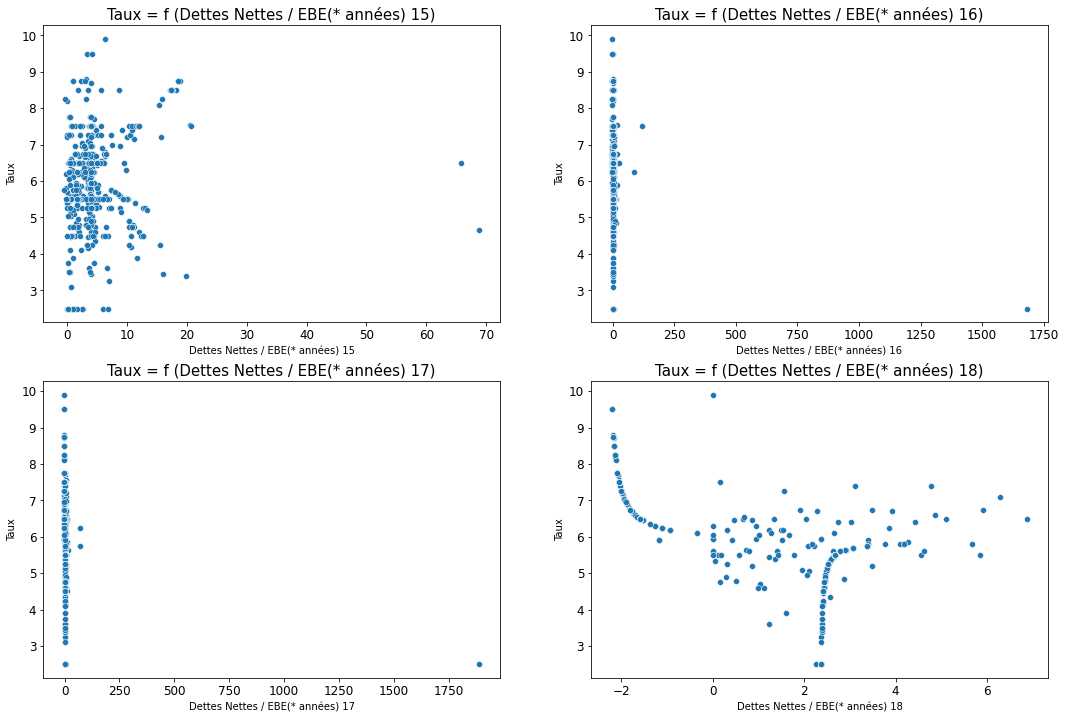

In [97]:
# Multivariate analysis between "Taux" and group of Dettes Nettes / EBE(* années) features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Dettes Nettes / EBE(* années) {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Dettes Nettes / EBE(* années) {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

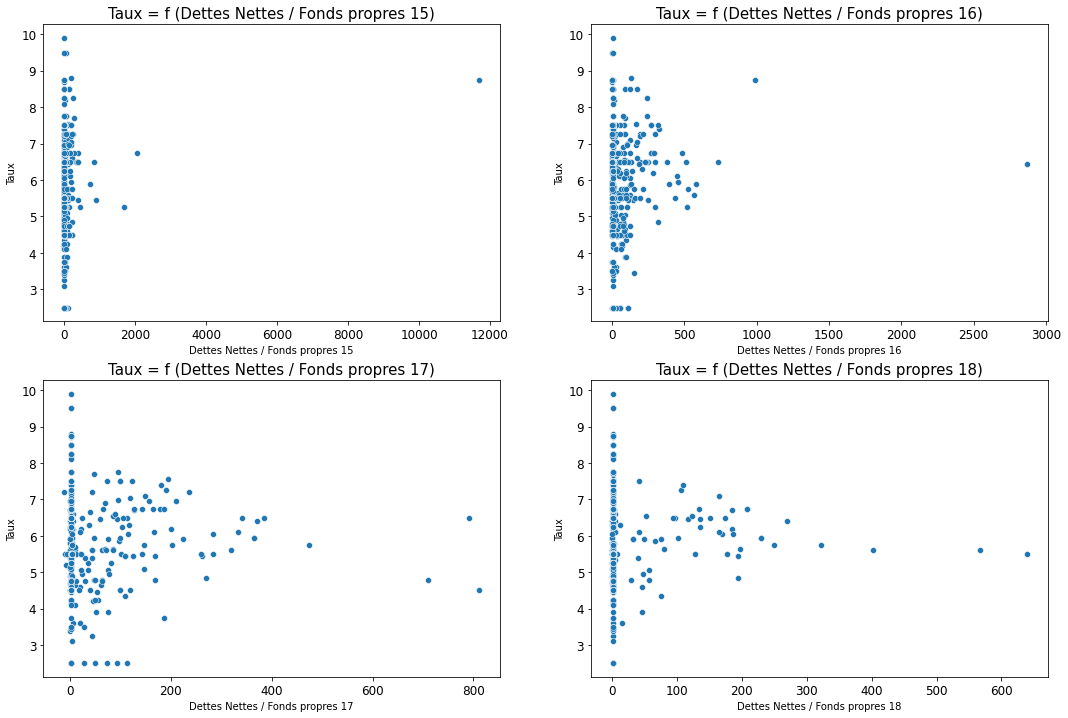

In [98]:
# Multivariate analysis between "Taux" and group of Dettes Nettes / Fonds propres features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"Dettes Nettes / Fonds propres {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (Dettes Nettes / Fonds propres {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

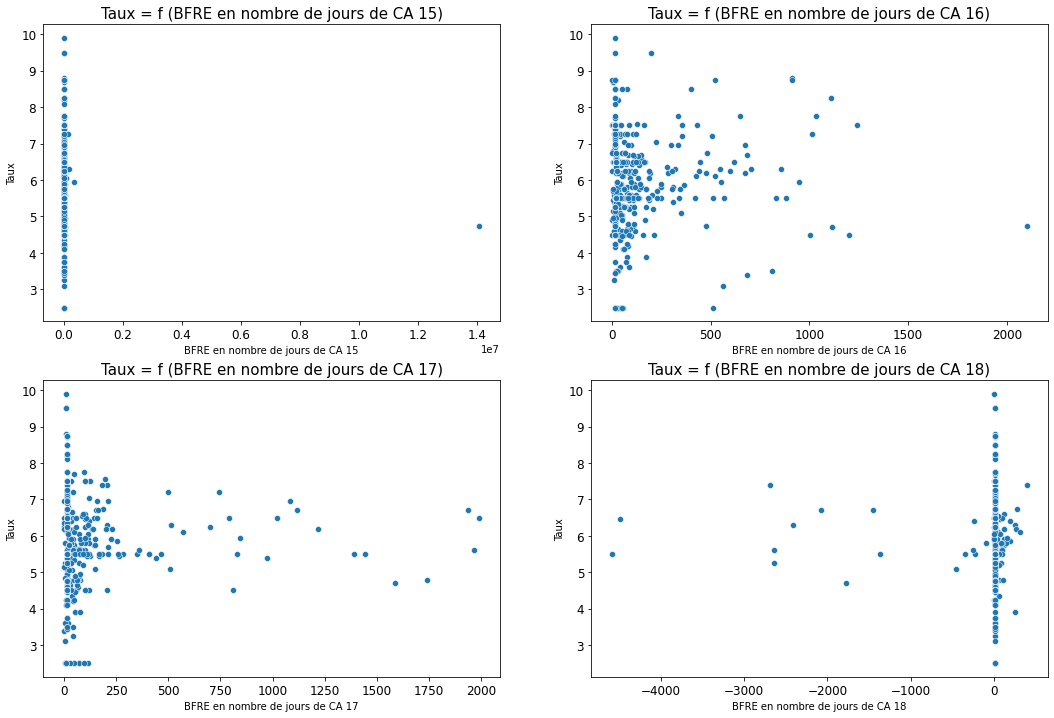

In [99]:
# Multivariate analysis between "Taux" and group of BFRE en nombre de jours de CA features.
fix, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(4) :
    k = i // 2
    m = i % 2
    sns.scatterplot(data[f"BFRE en nombre de jours de CA {i+15}"],data["Taux"],\
                   ax=ax[k,m],x_bins=[0,1])
    ax[k,m].set_title(f"Taux = f (BFRE en nombre de jours de CA {i+15})",size = 15)
    ax[k][m].tick_params(axis='x', labelsize=12)
    ax[k][m].tick_params(axis='y', labelsize=12)

==> The charte above don't show any important relationship between the analysed features.

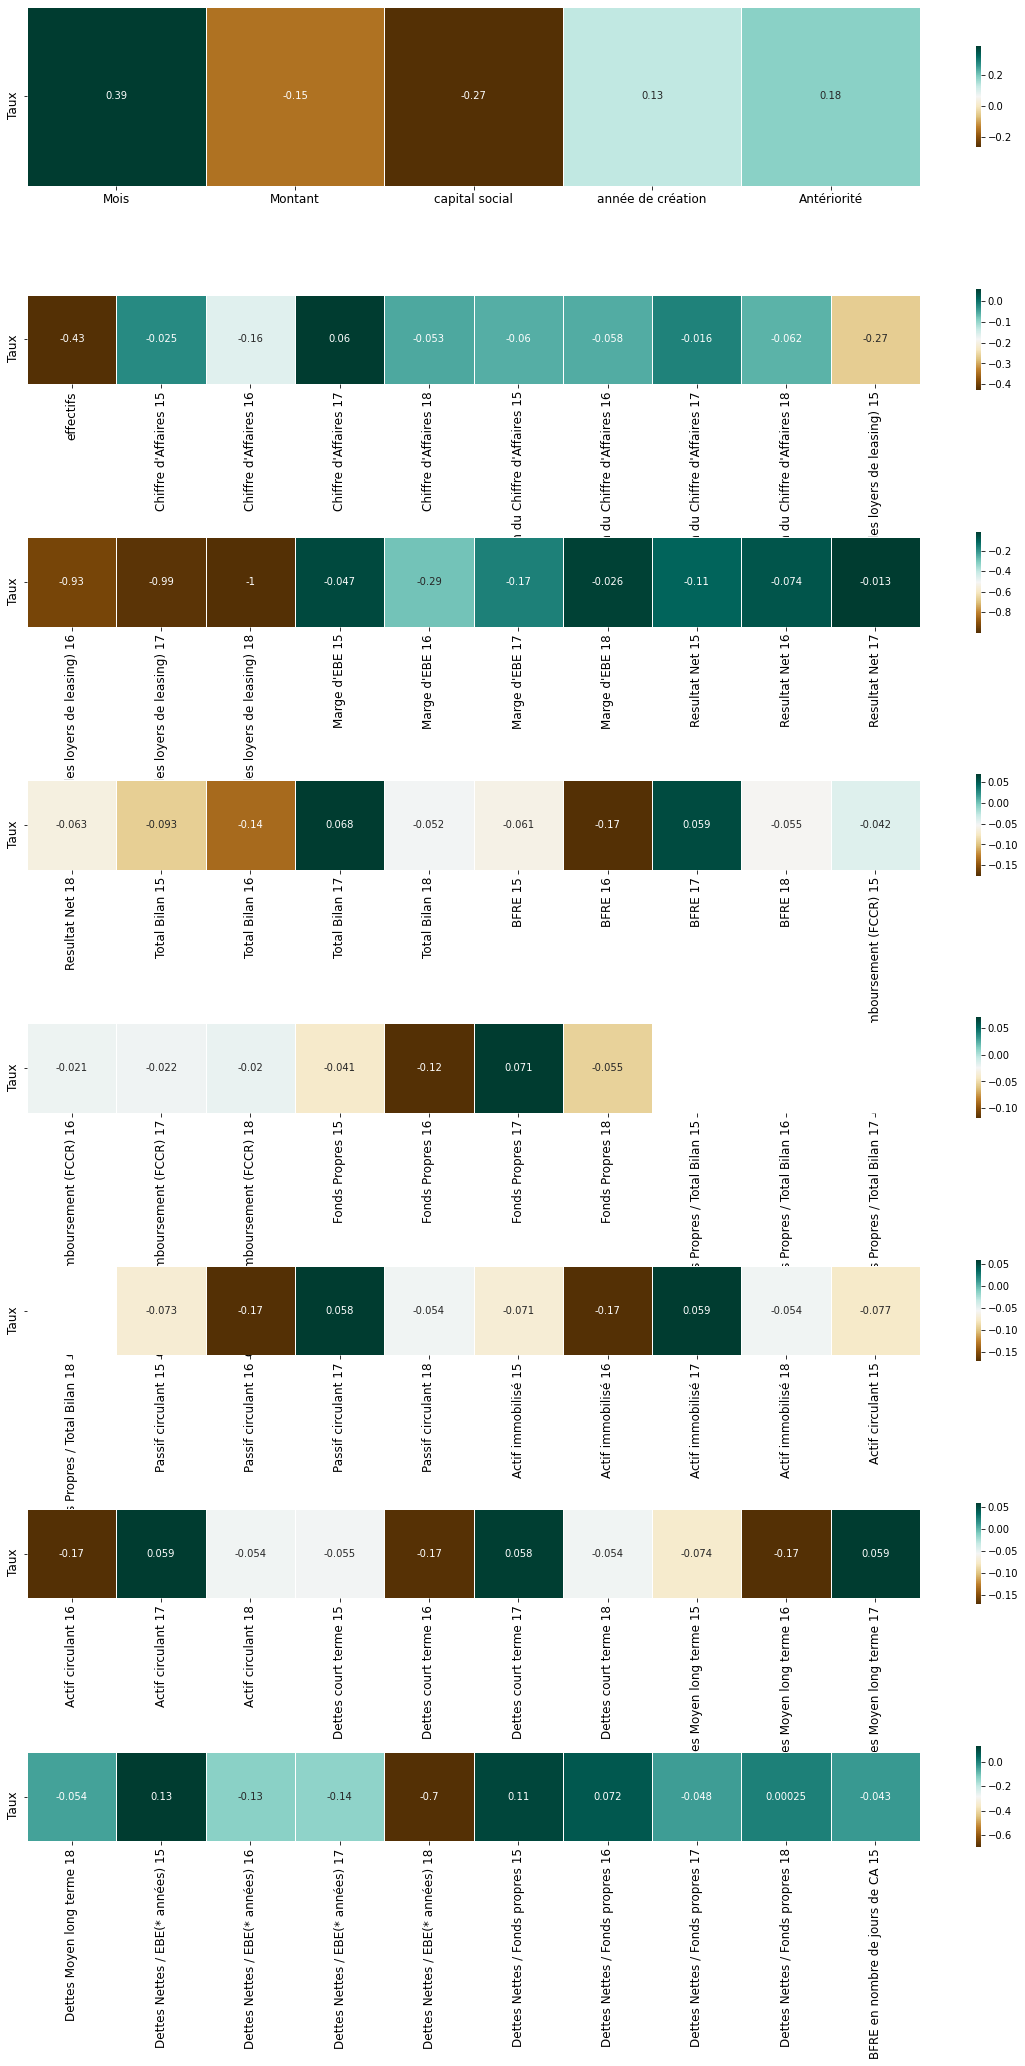

In [100]:
# Diplay correlation coefficients wuth all quantitatives features
f , ax = plt.subplots(8,1,figsize=(20,35))
for i in range(8) :
    correlation = pd.DataFrame({c:[data["Taux"].corr(data[c])] for c in data.columns[i*10:(i+1)*10] if c not in \
                           ("ID",'Niveau de risque',"Taux",'Emprunteur','Pays')},index=["Taux"])
    sns.heatmap(correlation,annot=True,square=True,cmap='BrBG',linewidths=0.5,cbar_kws={"shrink": .5},\
           ax=ax[i])
    #ax[i].set_title(f" Correlation of interest rate with features",size = 15)
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)


===> We can notice from the chart above :
 - Postive correlation between the rate of interest and the length of the loan.
 - Negative correlation between the rate of interest and the number of employe of the company.
 

## 2.2 Categorical variables:

> We will create new feature which assimilate the target "Taux" to categorical featurs. This 
by transorming their values to one of theses values ("Q1","Q2","Q3","Q4"). In deed the value
of the new feature get "Q1" if the value of "Taux" feature less to the first quantile of the 
variable "Taux". In general the new feature get :

        Qn if  the value of "Taux" variable is between the quantile(n-1) and the quantile (n)

In [101]:
def quartile_Taux(val):
    """function which can transform Taux values to catogorical values """
    q1 = data["Taux"].quantile(0.25)
    q2 = data["Taux"].quantile(0.5)
    q3 = data["Taux"].quantile(0.75)
    if val < q1 :
        return "Q1"
    elif val < q2 :
        return "Q2"
    elif val < q3 :
        return "Q3"
    else :
        return "Q4"

In [102]:
# create the categorical feature 
data["cat_Taux"] = [quartile_Taux(val) for val in data["Taux"].values]

In [103]:
def categorical_correlation(feature):
    piv_tab = pd.pivot_table(data,index=feature,columns="cat_Taux",values="Montant",aggfunc="count")
    ty = data["cat_Taux"].value_counts()
    tx = data[feature].value_counts()
    tx = pd.DataFrame(tx)
    ty = pd.DataFrame(ty)
    ind = piv_tab.index
    col = piv_tab.columns
    tx.columns = ["values"]
    ty.columns = ["values"]
    n = len(data)
    cnt = tx.dot(ty.T)/n
    cnt = cnt.loc[ind,col]
    mesure = (cnt - piv_tab) ** 2 /cnt
    xid = mesure.sum().sum()
    mesure = mesure 
    sns.heatmap(mesure,annot=True,linewidths=0.5,cmap="BrBG",vmin=0,vmax=1)
    plt.title(f"The correlation between the feature \'{feature}\' and 'Taux' feature")
    print(f"The total correlation between the feature \'{feature}\' and 'Taux' feature = {xid}")

The total correlation between the feature 'Pays' and 'Taux' feature = 20.73911739582486


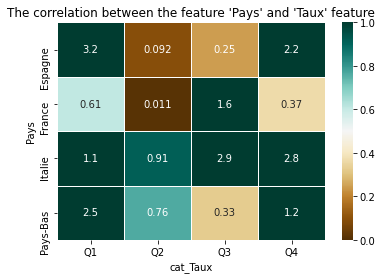

In [104]:
# correlation between the country of the company and the rate of interest 
categorical_correlation("Pays")

==> Doesn't seem any correlation between the origin country of the company and the rate of 
interest.

The total correlation between the feature 'Niveau de risque' and 'Taux' feature = 310.2577133327411


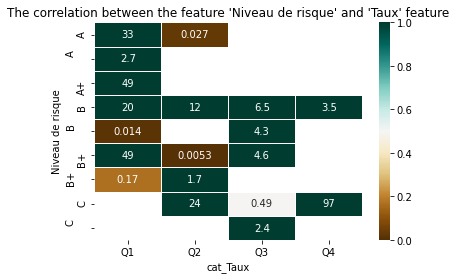

In [105]:
# correlation between the risk level and the rate of interest 
categorical_correlation("Niveau de risque")

===> It seems that the rate of interest is highly correalted with the "Niveau de risque feature".

### <font color=redblue> Insight  : The interest rate and the "niveau de risque" are not independant. it means the interest rate depend on the risk level.</font>

The total correlation between the feature 'Emprunteur' and 'Taux' feature = 1036.589916671401


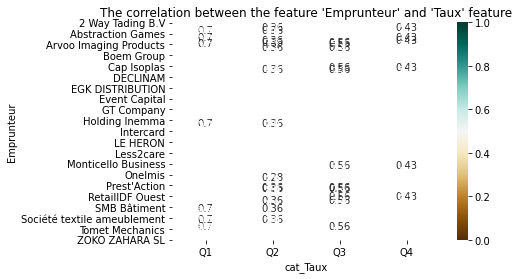

In [106]:
# correlation between the borrower and the rate of interest 
categorical_correlation("Emprunteur")

==> It seems that rate of interest move immensly in function of "Emprunter". So theses variables are highly correlated.

### <font color=redblue> Insight  : The interest rate and the "Emprunter" are not independant. it means the interest rate depend  highly in function of  the borrower.</font>

In [107]:
del(data["cat_Taux"])

## 2.3 Feature engineering :

In [108]:
df = data.copy()

In [109]:
# Create new features related to each risk level.
data = data.join(pd.get_dummies(data["Niveau de risque"]))


In [110]:
del(data["Niveau de risque"])

In [111]:
# Create new features related to each borrower .
data = data.join(pd.get_dummies(data["Emprunteur"]))
del(data["Emprunteur"])

In [112]:
# Create new features related to each country .
data = data.join(pd.get_dummies(data["Pays"]))
del(data["Pays"])

In [113]:
# Change the features "Antériorité" and "Ancienté" by soustract them the value of the current year.
data["Antériorité"] = 2019 - data["Antériorité"]
data["Anciennté"] = 2019 - data["année de création"]
del(data["année de création"])


# 3. Top 3 main highlights


- The rate of interest depend highly to the EBE state of the company.     
- The rate of interest depend highly to the risk level.    
- The rate of interest depend to the amount of the loan and the company human size.    


# 4. Export datas: 

In [114]:
del(data["ID"]) # useless columns
data.to_csv("data.csv",index=False)